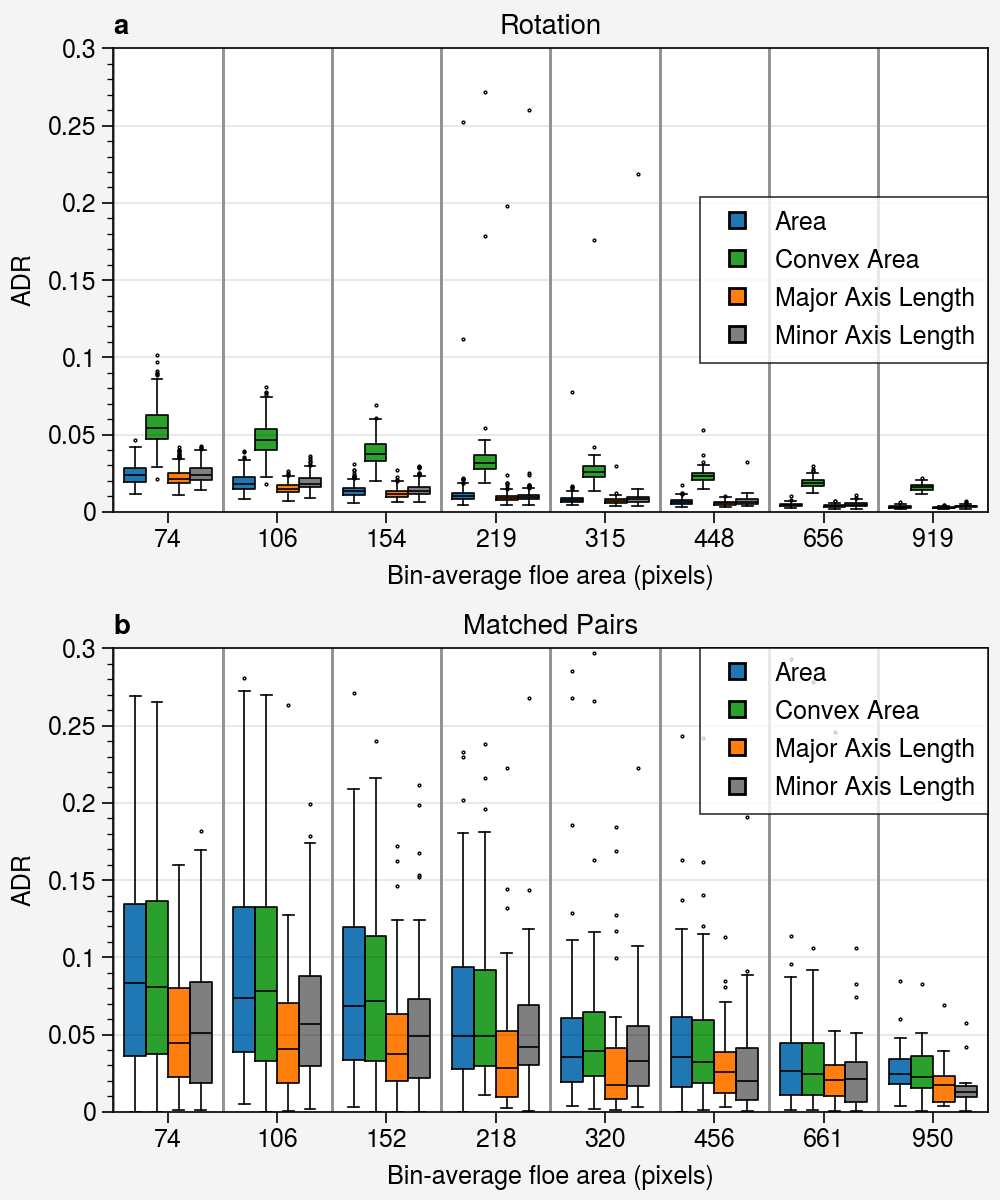

In [210]:
%run ../scripts/plot_adr_thresholds.py

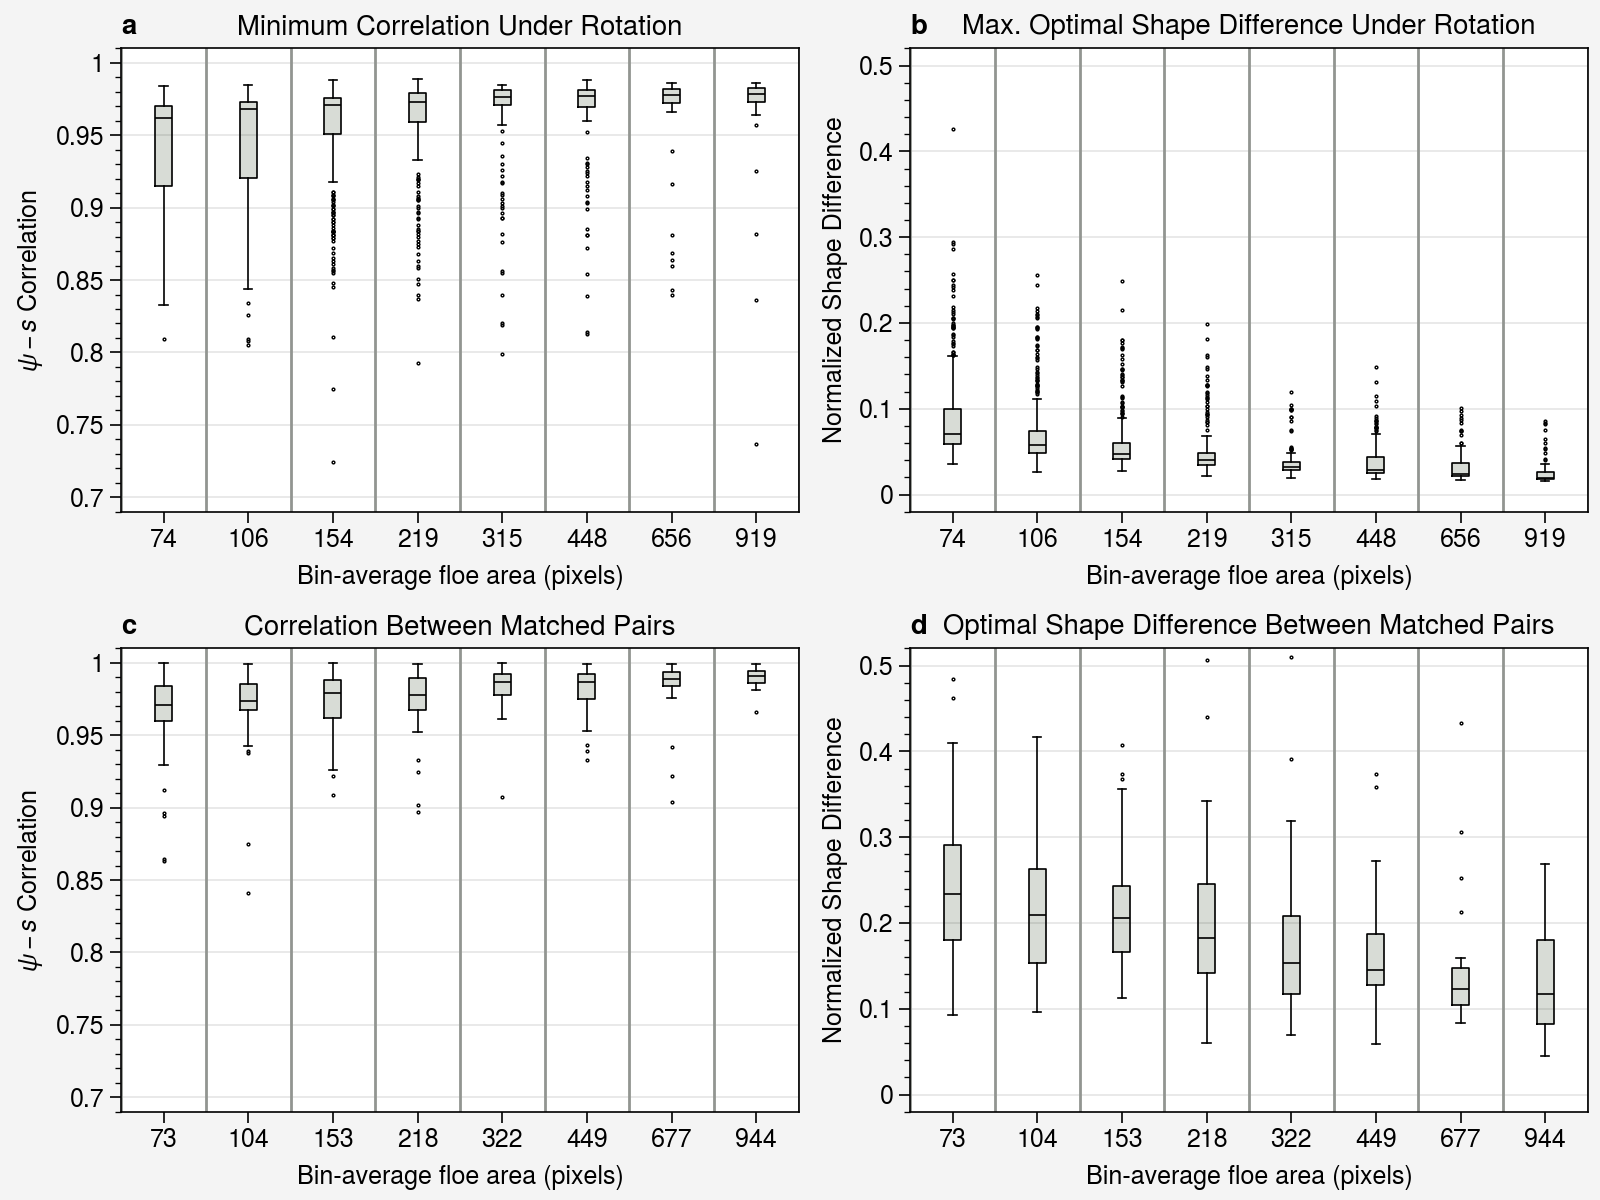

In [353]:
%run ../scripts/plot_psi_s_shape_difference.py

(array([1.255e+03, 1.090e+03, 2.220e+02, 1.070e+02, 7.400e+01, 2.200e+01,
        6.000e+00, 1.000e+00, 1.000e+00, 2.000e+00]),
 array([0.00429382, 0.04714802, 0.09000222, 0.13285642, 0.17571062,
        0.21856482, 0.26141902, 0.30427322, 0.34712742, 0.38998162,
        0.43283582]),
 <BarContainer object of 10 artists>)

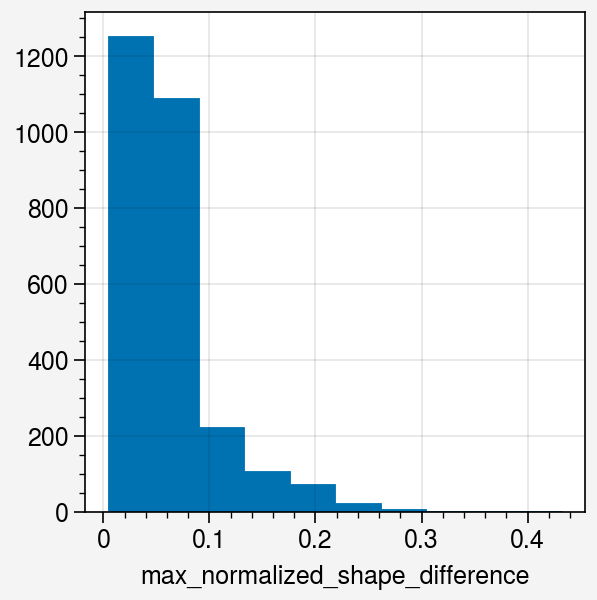

In [367]:
fig, ax = pplt.subplots()
ax.hist(df_rotation['max_normalized_shape_difference'])

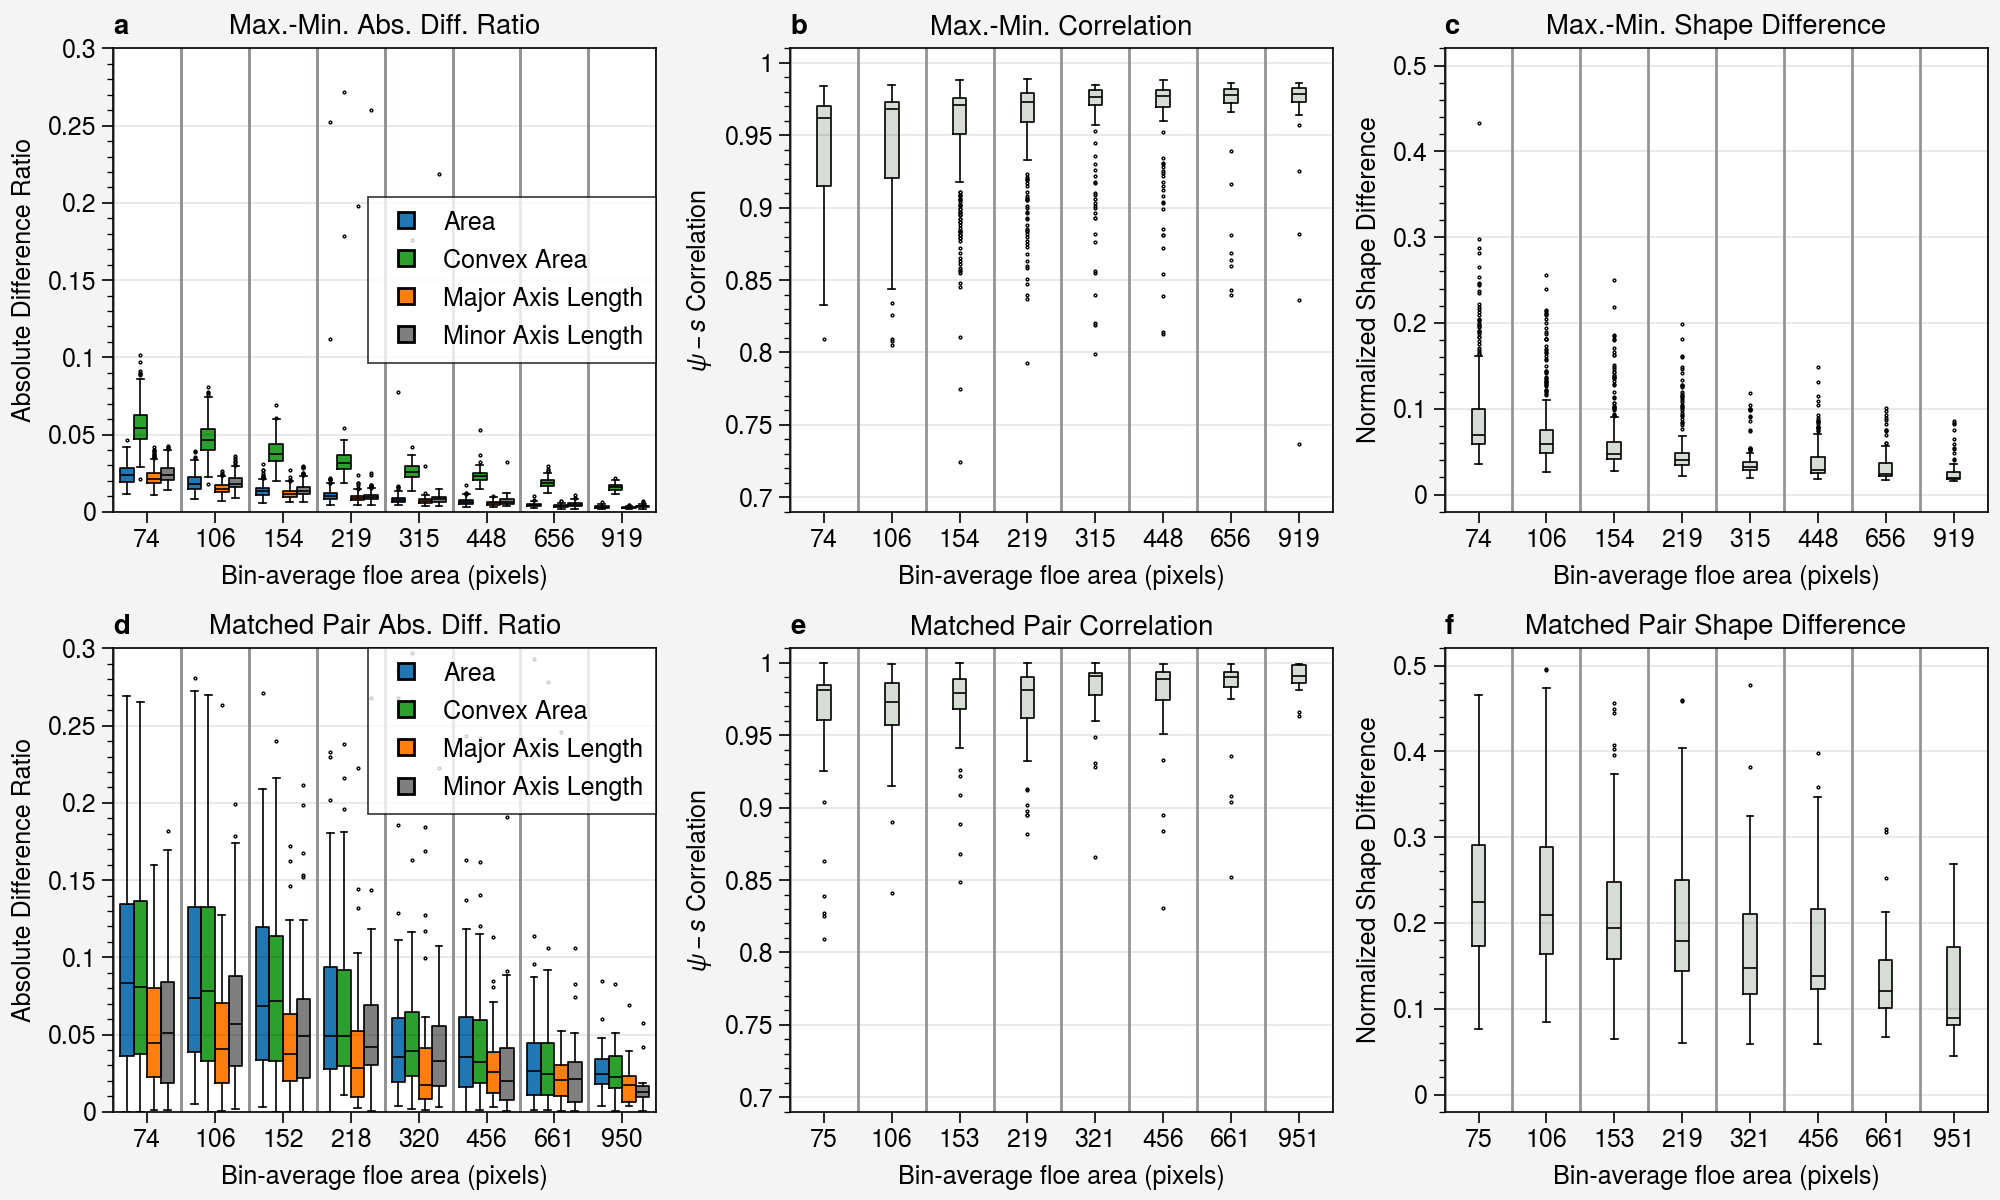

In [374]:
%run ../scripts/plot_adr_sd_psi_s_results.py

From the matched pairs and rotation experiments, we find that the uncertainty in the object parameters (as measured by the variation across manually verified matched pairs) is substantially larger for small floes (less than ~100 pixels) than for large floes (larger than ~500 pixels). Based on these measurements, larger errors are possible from rotation, but in most cases, variation in perceived shape across images much larger than error from rotation. Convex area is more sensitive to rotation changes than are the other three geometric measures. 

In [391]:
sum(df_matched.loc[df_matched.training, 'normalized_shape_difference'] > 0.5)

10

We calibrate the ADR settings by specifying a minimum floe size, a break point between small and large floes, and a maximum floe size. We set an absolute minimum of 8 by 8 pixels, then set a breakpoint at 20 by 20 pixels and max area at 

In [494]:
# Original paper uses 44 km2 as the minimum, 75 km2 as the division between small and large, and 4,225 km2 as the maximum floe size.
min_area = 64 # (2 km / 0.25 km/pixel)**2
breakpoint_area = 700 # (7 km / 0.25 km/pixel)**2 # Small floes = between min/break. Large floes: between break/max.
max_area = 25600 # (40 km / 0.25 km/pixel)**2

# Other options tested:
# breakpoint_area = 400 # (5 km / 0.25 km/pixel)**2 # Small floes = between min/break. Large floes: between break/max.
# breakpoint_area = 1200 (8.67 km / 0.25 km/pixel)**2 = 75 km2 = small/large division in the original paper
# max_area = 78400 # (70 km / 0.25 km/pixel)**2


In [436]:
import scipy.stats as stats
from scipy.stats import chi2

In [467]:
data = df_matched.loc[df_matched.training & df_matched.area.between(1200, max_area), 'adr_convex_area']
cfit = chi2.fit(data)
test_fun = chi2(cfit)
ks_stat, p_value = stats.kstest(data, chi2.name, args=cfit)

In [468]:
chi2.ppf(0.99, *cfit)

np.float64(6.23908369070475)

In [469]:
ks_stat, p_value

(np.float64(0.5020401167338071), np.float64(1.8731783537768455e-08))

<a list of 1 Line2D objects>

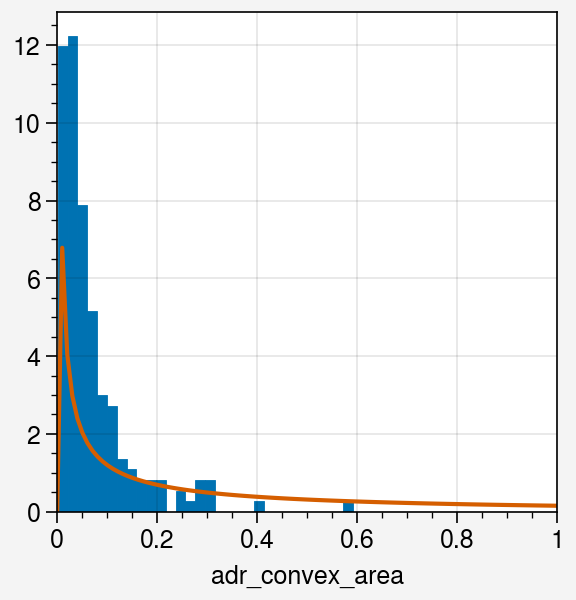

In [470]:
fig, ax = pplt.subplots()
ax.hist(df_matched.loc[df_matched.training & df_matched.area.between(200, 700), 'adr_convex_area'], bins=30, density=True)
x = np.linspace(0, 1, 100)
ax.plot(x, chi2.pdf(x, *cfit), label='chi2 fit')

# ax.plot(test_fun.pdf(np.linspace(0, 1, 100)))

In [380]:
df_matched.loc[df_matched.training & df_matched.area.between(64, 200), 'normalized_shape_difference'].quantile(0.99)

np.float64(0.4990948066298334)

In [381]:
df_matched.loc[df_matched.training & df_matched.area.between(200, 700), 'normalized_shape_difference'].quantile(0.99)

np.float64(0.6789440715883657)

Small adr_major_axis_length     99% 0.16 95% 0.13 n= 292
Large adr_major_axis_length     99% 0.12 95% 0.06 n= 72
Small adr_minor_axis_length     99% 0.2 95% 0.15 n= 292
Large adr_minor_axis_length     99% 0.12 95% 0.07 n= 72
Small adr_area                  99% 0.27 95% 0.21 n= 292
Large adr_area                  99% 0.18 95% 0.08 n= 72
Small adr_convex_area           99% 0.27 95% 0.21 n= 292
Large adr_convex_area           99% 0.17 95% 0.1 n= 72
Small normalized_shape_difference 99% 0.5 95% 0.41 n= 292
Large normalized_shape_difference 99% 0.32 95% 0.25 n= 72
Small psi_s_correlation         99% 0.16 95% 0.08 n= 292
Large psi_s_correlation         99% 0.11 95% 0.04 n= 72


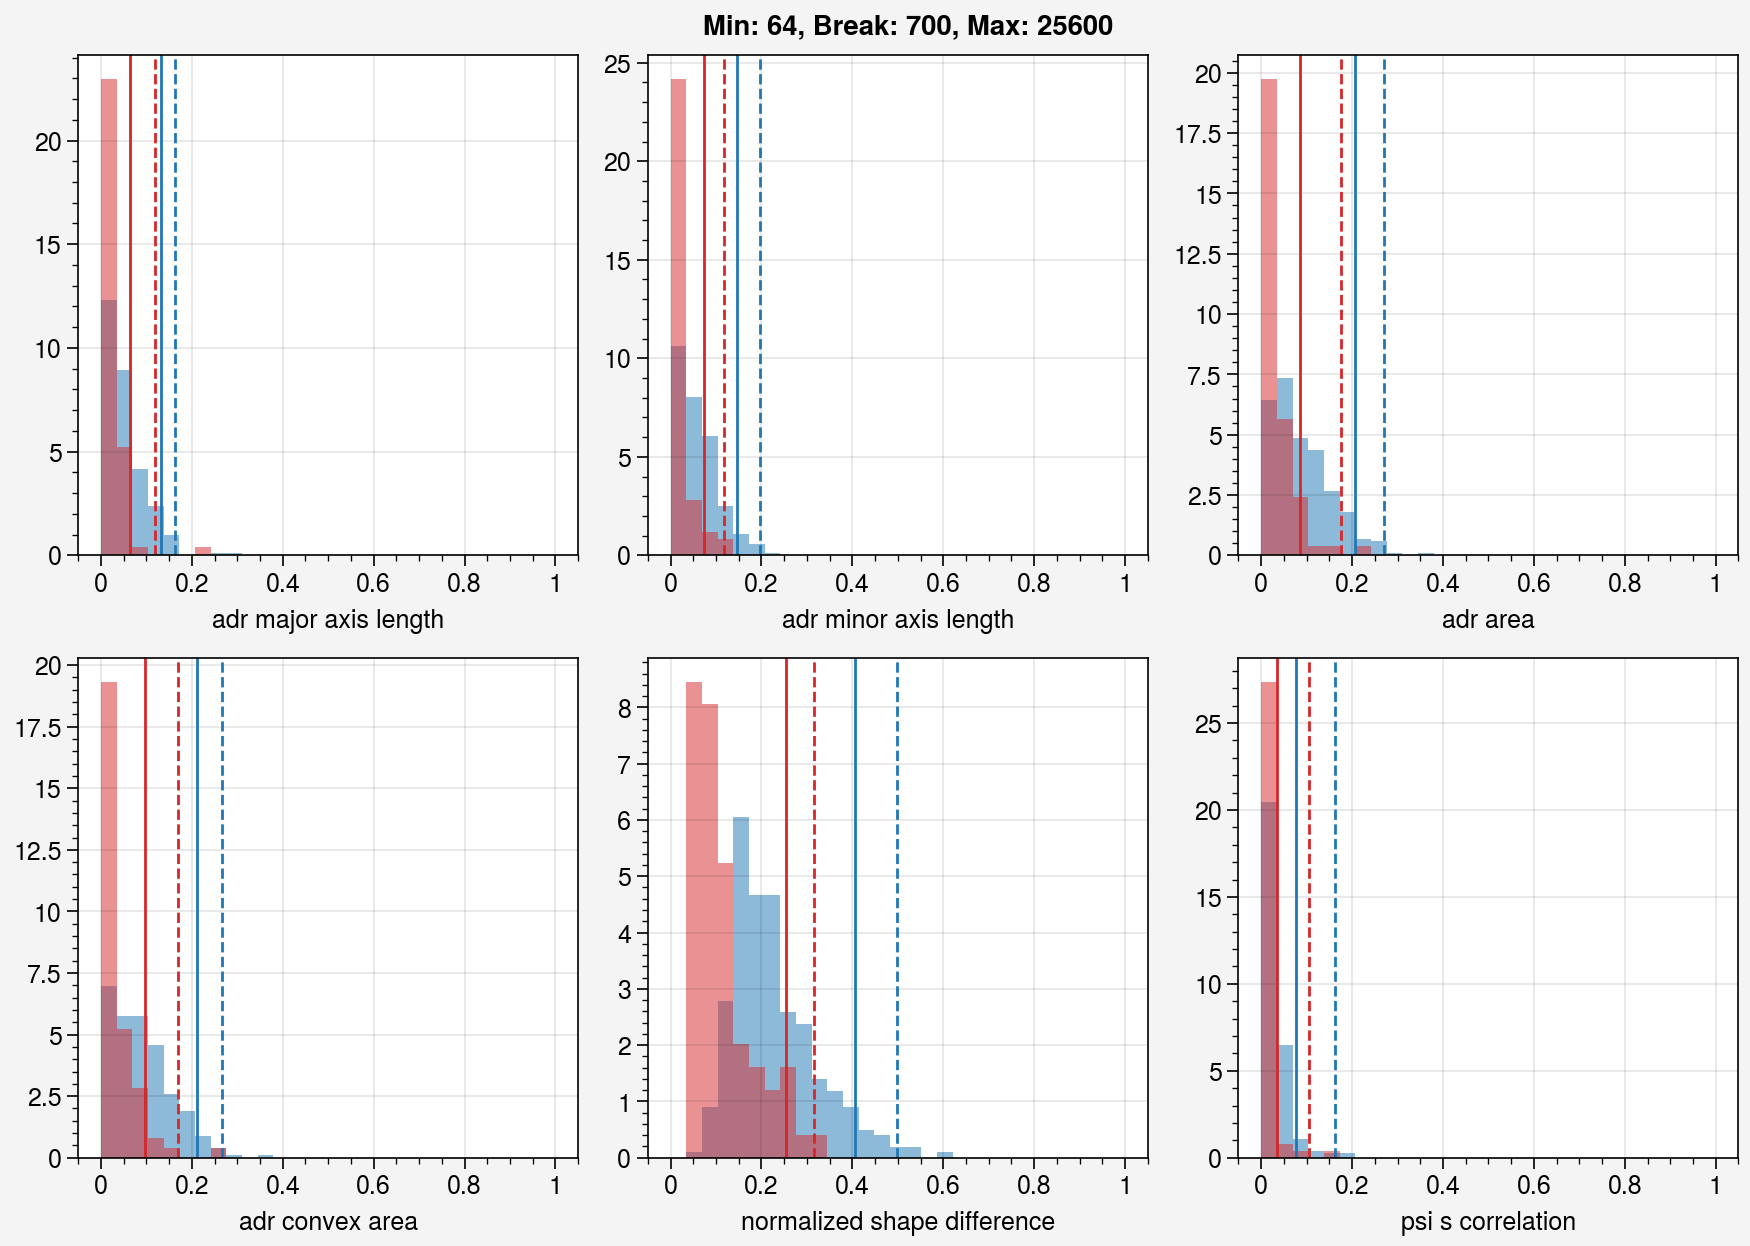

In [510]:
fig, axs = pplt.subplots(ncols=3, nrows=2, share=False)
for ax, variable in zip(axs, [ 'adr_major_axis_length', 'adr_minor_axis_length', 'adr_area', 'adr_convex_area',  'normalized_shape_difference', 'psi_s_correlation']):

    min_area = 64
    breakpoint_area = 200
    
    data = df_matched.loc[df_matched.training & df_matched.area.between(min_area, breakpoint_area), variable]
    if 'psi' in variable:
        data = 1 - data
    print('Small', variable.ljust(25), '99%', np.round(data.quantile(0.99), 2), '95%', np.round(data.quantile(0.95), 2), 'n=', len(data))
    ax.hist(data, bins = np.linspace(0, 1, 30), color='tab:blue', alpha=0.5, density=True, label='Area $\\in$ (64, 100)')
    ax.axvline(np.round(data.quantile(0.95), 3), color='tab:blue', lw=1)
    ax.axvline(np.round(data.quantile(0.99), 3), color='tab:blue', lw=1, ls='--')

    breakpoint_area = 700
    max_area = 25600
    
    data = df_matched.loc[df_matched.training & df_matched.area.between(breakpoint_area, max_area), variable]
    if 'psi' in variable:
        data = 1 - data
    print('Large', variable.ljust(25), '99%', np.round(data.quantile(0.99), 2), '95%', np.round(data.quantile(0.95), 2),  'n=', len(data))
    ax.hist(data, bins = np.linspace(0, 1, 30), color='tab:red', alpha=0.5, density=True, label='Area $>700$')
    ax.axvline(np.round(data.quantile(0.95), 3), color='tab:red', lw=1)
    ax.axvline(np.round(data.quantile(0.99), 3), color='tab:red', lw=1, ls='--')

    # print('\n')
    ax.format(xlabel=variable.replace('_', ' '))
ax.format(suptitle="Min: {minarea}, Break: {breakarea}, Max: {maxarea}".format(minarea=min_area, breakarea=breakpoint_area, maxarea=max_area))

Only minor differences exist with the 99th percentile for the area measures for the most case. There are a few outliers. One challenge with this method is that there are only 146 floes in the paired dataset larger than 400 pixels, whereas there are over 400 in the min-breakarea range. Hence, the upper bound is sensitive to outliers for large floes. Some options would include using kernel density estimates or interpolating the cumulative density function.

In [644]:
# Re-designing the plot/analysis script for clarity.

import pandas as pd
import os
import ultraplot as pplt
import numpy as np

# Define the area bin edges
# bins = np.logspace(1, 4, base=10, num=20)
# Using length scale bin instead
bins = np.arange(0, 100, 10)
plot_range = (5.5, 13.5)

# Load floe property tables. First need to run get_floe_property_tables.jl.
df_aqua_props = []
for file in os.listdir('../data/floe_property_tables/aqua/'):
    if 'csv' in file:
        df_temp = pd.read_csv('../data/floe_property_tables/aqua/' + file).loc[:, ['label', 'cloud_fraction']]
        df_temp['case'] = file.split('-')[0]
        df_aqua_props.append(df_temp)
df_aqua_props = pd.concat(df_aqua_props)
df_aqua_props['label'] = df_aqua_props['label'].astype(int)
df_aqua_props.rename({'label': 'aqua_label', 'cloud_fraction': 'aqua_cloud_fraction'}, axis=1, inplace=True)

df_terra_props = []
for file in os.listdir('../data/floe_property_tables/terra/'):
    if 'csv' in file:
        df_temp = pd.read_csv('../data/floe_property_tables/terra/' + file).loc[:, ['label', 'cloud_fraction']]
        df_temp['case'] = file.split('-')[0]
        df_terra_props.append(df_temp)
df_terra_props = pd.concat(df_terra_props)
df_terra_props['label'] = df_terra_props['label'].astype(int)
df_terra_props.rename({'label': 'terra_label', 'cloud_fraction': 'terra_cloud_fraction'}, axis=1, inplace=True)

# Get test/train index data
df_testtrain = pd.read_csv('../data/validation_dataset_testtrain_split.csv').rename({'Unnamed: 0': 'case'}, axis=1)
df_testtrain['case_number'] = [str(x).zfill(3) for x in df_testtrain['case_number']]

#### Load the rotation data ######
# First need to run the julia script rotation_test_floe_shapes_ADR.jl
data = []
for fname in os.listdir('../data/rotation_test/'):
    if '.csv' in fname:
        df = pd.read_csv('../data/rotation_test/' + fname)
        df['case'] = fname.split('-')[0].replace('.csv', '')
        if len(df) > 0:
            data.append(df)
df_all = pd.concat(data).reset_index(drop=True)
df_all['floe_id'] = [cn + '_' + str(f).zfill(4) for cn, f in zip(
                                df_all['case'], df_all['floe_id'])]
df_all = df_all.loc[df_all.area > 50]
df_all["L"] = np.sqrt(df_all.area)
df_all['normalized_shape_difference'] = df_all['minimum_shape_difference'] / df_all['area']
comp_columns = ['area', 'convex_area', 'major_axis_length', 'minor_axis_length',
                'adr_area', 'adr_convex_area', 'adr_major_axis_length',
                'adr_minor_axis_length', 'normalized_shape_difference']

df_init = df_all.loc[df_all.rotation==0, ['floe_id', 'case', 'area', 'perimeter']].set_index('floe_id')
df_max = df_all.groupby('floe_id').max()[comp_columns]
df_max.columns = df_max.add_prefix('max_', axis=1).columns

df_min = df_all[['floe_id', 'psi_s_correlation']].groupby('floe_id').min()
df_min.columns = df_min.add_prefix('min_', axis=1).columns

df_init = df_all.loc[df_all.rotation==0, ['floe_id', 'case', 'area', 'L', 'convex_area', 'major_axis_length',
       'minor_axis_length']].set_index('floe_id')
df_rotation = pd.merge(df_init, df_max, left_index=True, right_index=True).merge(df_min, left_index=True, right_index=True)
df_rotation['L'] = np.sqrt(df_rotation['area'])
# df_rotation['area_bin'] = np.digitize(df_rotation['area'], bins)
df_rotation['length_bin'] = np.digitize(df_rotation['L'], bins)

# Divide into testing and training datasets
training_idx = df_testtrain.loc[df_testtrain.satellite == 'aqua', ['case_number', 'training']].set_index('case_number')
df_rotation['training'] = False
df_rotation.loc[training_idx.loc[df_rotation['case']].values.squeeze(), 'training'] = True
df_rot = df_rotation.loc[df_rotation.training, :].copy()

rotated_bin_count = df_rot[['length_bin', 'L']].groupby('length_bin').agg(['mean', 'count'])
rotated_bin_count.columns = ['_'.join(col).strip() for col in rotated_bin_count.columns.values]


#### Load the matched pairs data ######
# First need to run the julia scripts matched_pairs_test_floe_shapes.jl and get_floe_property_tables.jl
data = []
for fname in os.listdir('../data/matched_pairs_test/'):
    if '.csv' in fname:
        df = pd.read_csv('../data/matched_pairs_test/' + fname)
        df['case'] = fname.split('-')[0].replace('.csv', '')
        if len(df) > 0:
            data.append(df)
df_matched = pd.concat(data).reset_index(drop=True)
df_matched['floe_id'] = [cn + '_' + str(f).zfill(4) for cn, f in zip(
                                df_matched['case'], df_matched['aqua_label'])]
df_matched['area'] = df_matched[['aqua_area', 'terra_area']].mean(axis=1)
df_matched['perimeter'] = df_matched[['aqua_perimeter', 'terra_perimeter']].mean(axis=1)
df_matched['normalized_shape_difference'] = df_matched['minimum_shape_difference'] / df_matched['area']
df_matched = df_matched.loc[df_matched.area > 50]
df_matched["L"] = np.sqrt(df_matched.area)

df_matched['length_bin'] = np.digitize(df_matched['L'], bins)
df_matched = df_matched.merge(
    df_aqua_props, left_on=['case', 'aqua_label'], right_on=['case', 'aqua_label']).merge(
    df_terra_props, left_on=['case', 'terra_label'], right_on=['case', 'terra_label'])

# Divide into testing and training datasets
training_idx = df_testtrain.loc[df_testtrain.satellite == 'aqua', ['case_number', 'training']].set_index('case_number')
df_matched['training'] = training_idx.loc[df_matched['case']].values

df_mg = df_matched.loc[df_matched.training & (df_mg[['terra_cloud_fraction', 'aqua_cloud_fraction']].max(axis=1) < 0.4), :].copy()
   
matched_bin_count = df_matched[['length_bin', 'L']].groupby('length_bin').agg(['mean', 'count'])
matched_bin_count.columns = ['_'.join(col).strip() for col in matched_bin_count.columns.values]

In [645]:
matched_bin_count['area'] = matched_bin_count['L_mean']**2
matched_bin_count

,L_mean,L_count,area
length_bin,,,
1,8.779266,228,77.075519
2,13.862911,487,192.180290
3,23.996740,174,575.843533
4,33.956203,37,1153.023752
5,43.447033,20,1887.644698
6,55.381759,10,3067.139216
7,65.215498,3,4253.061225
8,70.452111,1,4963.500000
9,82.786537,3,6853.610791


In [605]:
data = df_rot.pivot_table(columns='length_bin', values=var, index=df_rot.index)
col_means = rotated_bin_count.loc[data.columns, 'L_mean'].round(2)
col_counts = rotated_bin_count.loc[data.columns, 'L_count']

xlim = (rotated_bin_count.loc[rotated_bin_count.L_count > 30, 'L_mean'].min() - 5, 
        rotated_bin_count.loc[rotated_bin_count.L_count > 30, 'L_mean'].max() + 5)

In [606]:
bin_centers = 0.5 * (bins[1:] + bins[:-1])
bin_centers

array([ 5., 15., 25., 35., 45., 55., 65., 75., 85.])

In [727]:
matched_bin_count

,L_mean,L_count,area
length_bin,,,
1,8.779266,228,77.075519
2,13.862911,487,192.180290
3,23.996740,174,575.843533
4,33.956203,37,1153.023752
5,43.447033,20,1887.644698
6,55.381759,10,3067.139216
7,65.215498,3,4253.061225
8,70.452111,1,4963.500000
9,82.786537,3,6853.610791


In [699]:
df_rot.columns

Index(['case', 'area', 'L', 'convex_area', 'major_axis_length',
       'minor_axis_length', 'max_area', 'max_convex_area',
       'max_major_axis_length', 'max_minor_axis_length', 'max_adr_area',
       'max_adr_convex_area', 'max_adr_major_axis_length',
       'max_adr_minor_axis_length', 'max_normalized_shape_difference',
       'min_psi_s_correlation', 'length_bin', 'training'],
      dtype='object')

With the data in place, I can update each of the figure panels to include the training data boxplots and the parametrization. 

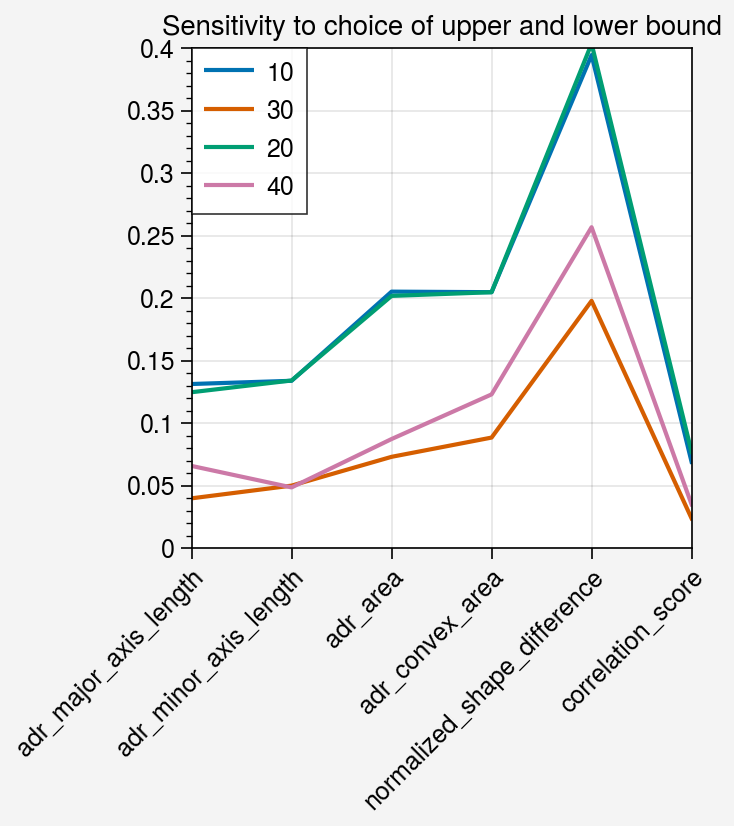

In [750]:
# Matched Pairs
df_mg['correlation_score'] = 1 - df_mg['psi_s_correlation']
measures =  ['adr_major_axis_length', 'adr_minor_axis_length', 'adr_area', 'adr_convex_area',
             'normalized_shape_difference', 'correlation_score']
fig, ax = pplt.subplots()
ax.plot(pd.DataFrame({"Small Floes": df_mg.loc[df_mg.L < 10, measures].quantile(0.95), 
             "Large Floes": df_mg.loc[df_mg.L > 30, measures].quantile(0.95)}), label=['10', '30'])
ax.format(xrotation=45)
ax.plot(pd.DataFrame({"Small Floes": df_mg.loc[df_mg.L < 20, measures].quantile(0.95), 
             "Large Floes": df_mg.loc[df_mg.L > 40, measures].quantile(0.95)}), label=['20', '40'])
ax.format(xrotation=45, ylim=(0, 0.4), title='Sensitivity to choice of upper and lower bound')
ax.legend(ncols=1)

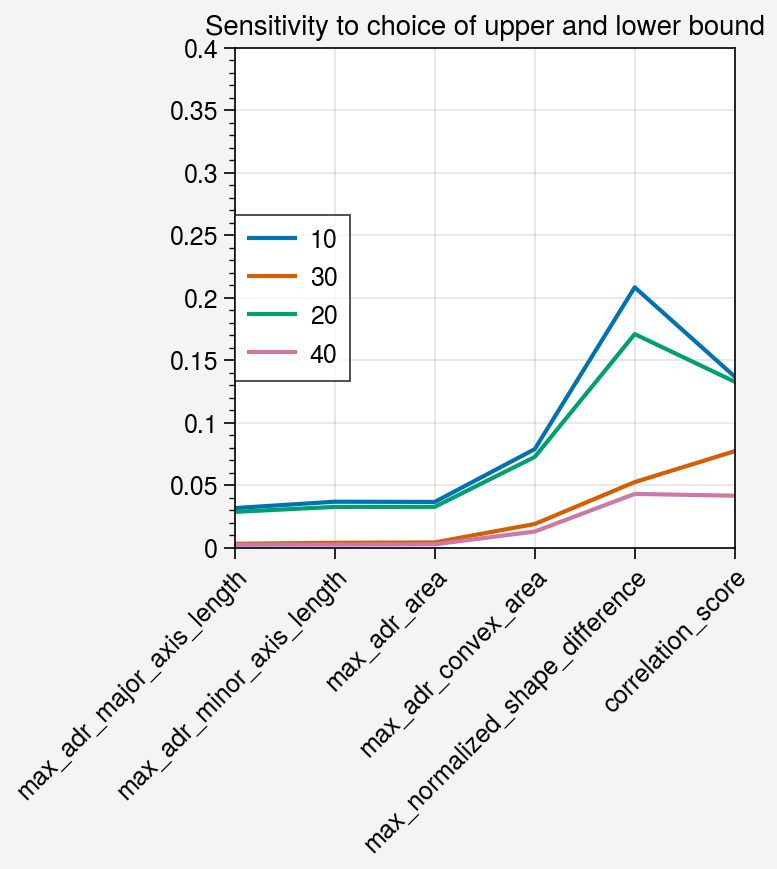

In [748]:
# Rotation
df_rot['correlation_score'] = 1 - df_rot['min_psi_s_correlation']
measures =  ['max_adr_major_axis_length', 'max_adr_minor_axis_length', 'max_adr_area', 'max_adr_convex_area',
             'max_normalized_shape_difference', 'correlation_score']

fig, ax = pplt.subplots()
ax.plot(pd.DataFrame({"Small Floes": df_rot.loc[df_rot.L < 10, measures].quantile(0.95), 
             "Large Floes": df_rot.loc[df_rot.L > 30, measures].quantile(0.95)}), label=['10', '30'])
ax.format(xrotation=45)
ax.plot(pd.DataFrame({"Small Floes": df_rot.loc[df_rot.L < 20, measures].quantile(0.95), 
             "Large Floes": df_rot.loc[df_rot.L > 40, measures].quantile(0.95)}), label=['20', '40'])
ax.format(xrotation=45, ylim=(0, 0.4), title='Sensitivity to choice of upper and lower bound')
ax.legend(ncols=1)

In [754]:
measures =  ['max_adr_major_axis_length', 'max_adr_minor_axis_length', 'max_adr_area', 'max_adr_convex_area',
             'max_normalized_shape_difference', 'correlation_score']

pd.DataFrame({"Small Floes": df_rot.loc[df_rot.L < 10, measures].quantile(0.95), 
             "Large Floes": df_rot.loc[df_rot.L > 30, measures].quantile(0.95)})

,Small Floes,Large Floes
max_adr_major_axis_length,0.031913,0.003338
max_adr_minor_axis_length,0.037003,0.004125
max_adr_area,0.036835,0.004435
max_adr_convex_area,0.079034,0.019174
max_normalized_shape_difference,0.208533,0.052693
correlation_score,0.137100,0.077450


In [755]:
measures =  ['adr_major_axis_length', 'adr_minor_axis_length', 'adr_area', 'adr_convex_area',
             'normalized_shape_difference', 'correlation_score']

pd.DataFrame({"Small Floes": df_mg.loc[df_mg.L < 10, measures].quantile(0.95), 
             "Large Floes": df_mg.loc[df_mg.L > 30, measures].quantile(0.95)})

,Small Floes,Large Floes
adr_major_axis_length,0.131279,0.039824
adr_minor_axis_length,0.133847,0.049986
adr_area,0.205178,0.073026
adr_convex_area,0.204751,0.088423
normalized_shape_difference,0.394447,0.197793
correlation_score,0.069000,0.023750


In [ ]:
fig, axs = pplt.subplots(nrows=2, share=False)
ax = axs[0]
ax.scatter(df_rot.L, df_rot.correlation_score, marker='.')
ax.format(yscale='log')
ax.axhline(0.16)
ax.axhline(0.07)

ax = axs[1]
ax.hist(df_rot.loc[df_rot.L > 30, 'correlation_score'])

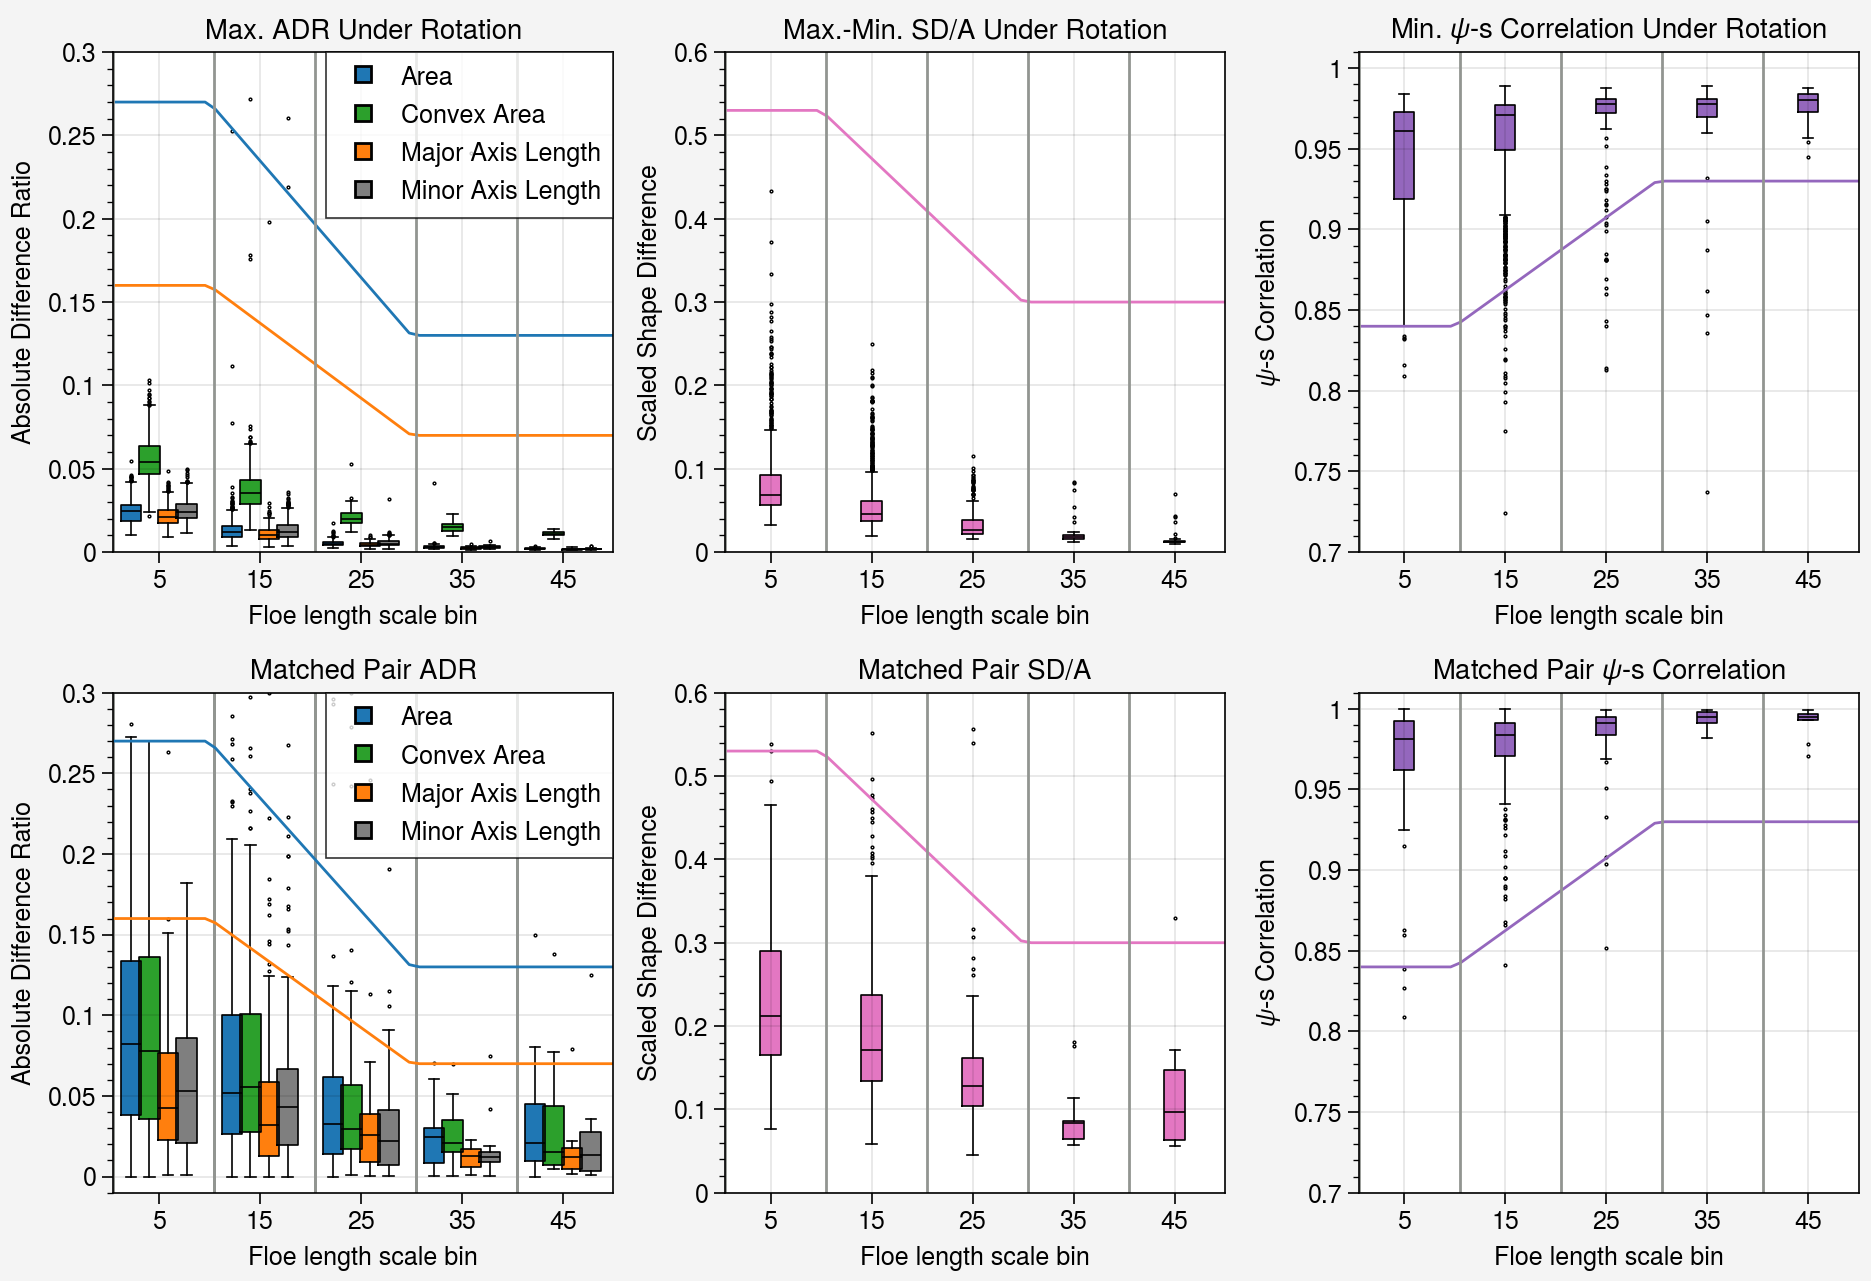

In [730]:
n_min = 20

var = 'max_adr_convex_area'
length_min = 10
length_max = 30
x = np.linspace(xlims[0], xlims[1], 50)

# Update values below based on the calibration results (99th percentile for above / below value)
adr_area_threshold = lambda x: np.array([piecewise_threshold(x0, length_min, length_max, 0.27, 0.13) for x0 in x])
adr_convex_area_threshold = lambda x: np.array([piecewise_threshold(x0, length_min, length_max, 0.27, 0.13) for x0 in x])
adr_major_axis_threshold = lambda x: np.array([piecewise_threshold(x0, length_min, length_max, 0.16, 0.07) for x0 in x])
adr_minor_axis_threshold = lambda x: np.array([piecewise_threshold(x0,  length_min, length_max, 0.17, 0.11) for x0 in x])
scaled_shape_difference_threshold = lambda x: np.array([piecewise_threshold(x0, length_min,  length_max, 0.53, 0.30) for x0 in x])
psi_s_corr_threshold = lambda x: np.array([piecewise_threshold(x0, length_min,  length_max, 0.84, 0.93) for x0 in x])



fig, axs = pplt.subplots(nrows=2, ncols=3, share=False)

col_means = rotated_bin_count.loc[:, 'L_mean'].round(2)
col_counts = rotated_bin_count.loc[:, 'L_count']
xlims = (0.5, 50)
###### Rotation ########
# 1. ADRs
ax = axs[0, 0]
h = []
for var, color, offset in zip(
    ['max_adr_area', 'max_adr_convex_area', 'max_adr_major_axis_length', 'max_adr_minor_axis_length'],
    ['tab:blue', 'tab:green', 'tab:orange', 'tab:gray'],
    np.linspace(-2.75, 2.75, 4)):
    
    data = df_rot.pivot_table(columns='length_bin', values=var, index=df_rot.index)
    data = data.loc[:, col_counts.values > n_min]
    data.columns = bin_centers[col_counts[col_counts >= n_min].index - 1] + offset
    ax.box(data, fillcolor=color,  showfliers=True, marker='.', markersize=1, widths=2)
    h.append(ax.plot([],[], m='s', c=color, lw=0, ec='k'))


ax.plot(x, adr_area_threshold(x), color='tab:blue', lw=1, marker='')
ax.plot(x, adr_major_axis_threshold(x), color='tab:orange', lw=1, marker='')

for xc in bins:
    ax.axvline(xc + 0.5, lw=1, color='gray')

ax.format(xtickminor=False, #xlocator=bin_area_ave.round().values.squeeze(),
          xlocator=bin_centers, xlim=xlims, ylim=(0, 0.3),
          xformatter=[str(int(x)) for x in bin_centers], xrotation=0,
         title='Max. ADR Under Rotation', xlabel='Floe length scale bin', ylabel='Absolute Difference Ratio',
         xgrid=True)
ax.legend(h, ['Area', 'Convex Area', 'Major Axis Length', 'Minor Axis Length'], ncols=1)

# 2. Normalized Shape Difference
ax = axs[0,1]
var =  'max_normalized_shape_difference'
color = 'tab:pink'
data = df_rot.pivot_table(columns='length_bin', values=var, index=df_rot.index)
data = data.loc[:, col_counts.values >= n_min]
data.columns = bin_centers[col_counts[col_counts >= n_min].index - 1]
ax.box(data, fillcolor=color,  showfliers=True, marker='.', markersize=1, widths=2)
ax.plot(x, scaled_shape_difference_threshold(x), color=color, lw=1, marker='')


for xc in bins:
    ax.axvline(xc + 0.5, lw=1, color='gray')

ax.format(xtickminor=False, #xlocator=bin_area_ave.round().values.squeeze(),
          xlocator=bin_centers, xlim=xlims, ylim=(0, 0.6),
          xformatter=[str(int(x)) for x in bin_centers], xrotation=0,
         title='Max.-Min. SD/A Under Rotation', xlabel='Floe length scale bin', ylabel='Scaled Shape Difference',
         xgrid=True)

# 3. Psi-s Correlation
ax = axs[0, 2]
var = 'min_psi_s_correlation'
color = 'tab:purple'
data = df_rot.pivot_table(columns='length_bin', values=var, index=df_rot.index)
data = data.loc[:, col_counts.values >= n_min]
data.columns = bin_centers[col_counts[col_counts >= n_min].index - 1]
ax.box(data, fillcolor=color,  showfliers=True, marker='.', markersize=1, widths=2)
ax.plot(x, psi_s_corr_threshold(x), color=color, lw=1, marker='')


for xc in bins:
    ax.axvline(xc + 0.5, lw=1, color='gray')

ax.format(xtickminor=False, #xlocator=bin_area_ave.round().values.squeeze(),
          xlocator=bin_centers, xlim=xlims, ylim=(0.7, 1.01),
          xformatter=[str(int(x)) for x in bin_centers], xrotation=0,
         title='Min. $\\psi$-s Correlation Under Rotation', xlabel='Floe length scale bin', ylabel='$\\psi$-s Correlation',
         xgrid=True)

##### Matched Pairs ######
col_means = matched_bin_count.loc[:, 'L_mean'].round(2)
col_counts = matched_bin_count.loc[:, 'L_count']
xlims = (0.5, 50)

# 1. ADRs
ax = axs[1, 0]
h = []
for var, color, offset in zip(
    ['adr_area', 'adr_convex_area', 'adr_major_axis_length', 'adr_minor_axis_length'],
    ['tab:blue', 'tab:green', 'tab:orange', 'tab:gray'],
    np.linspace(-2.75, 2.75, 4)):

    data = df_mg.pivot_table(columns='length_bin', values=var, index=df_mg.index)
    data = data.loc[:, [x for x in data.columns if col_counts[x] >= n_min]]
    data.columns = bin_centers[col_counts[col_counts >= n_min].index - 1] + offset
    ax.box(data, fillcolor=color,  showfliers=True, marker='.', markersize=1, widths=2)
    h.append(ax.plot([],[], m='s', c=color, lw=0, ec='k'))
    
    for xc in bins:
        ax.axvline(xc + 0.5, lw=1, color='gray')
ax.plot(x, adr_area_threshold(x), color='tab:blue', lw=1, marker='')
ax.plot(x, adr_major_axis_threshold(x), color='tab:orange', lw=1, marker='')

ax.format(xtickminor=False, #xlocator=bin_area_ave.round().values.squeeze(),
          xlocator=bin_centers, xlim=xlims, ylim=(-0.01, 0.3),
          xformatter=[str(int(x)) for x in bin_centers], xrotation=0,
          title='Matched Pair ADR', xlabel='Floe length scale bin', ylabel='Absolute Difference Ratio',
          xgrid=False)

ax.legend(h, ['Area', 'Convex Area', 'Major Axis Length', 'Minor Axis Length'], ncols=1)

# 2. Normalized Shape Difference
ax = axs[1,1]
var =  'normalized_shape_difference'
color = 'tab:pink'
data = df_mg.pivot_table(columns='length_bin', values=var, index=df_mg.index)
data = data.loc[:, [x for x in data.columns if col_counts[x] >= n_min]]
data.columns = bin_centers[col_counts[col_counts >= n_min].index - 1]
ax.box(data, fillcolor=color,  showfliers=True, marker='.', markersize=1, widths=2)
ax.plot(x, scaled_shape_difference_threshold(x), color=color, lw=1, marker='')
for xc in bins:
    ax.axvline(xc + 0.5, lw=1, color='gray')

ax.format(xtickminor=False, #xlocator=bin_area_ave.round().values.squeeze(),
          xlocator=bin_centers, xlim=xlims, ylim=(0, 0.6),
          xformatter=[str(int(x)) for x in bin_centers], xrotation=0,
         title='Matched Pair SD/A', xlabel='Floe length scale bin', ylabel='Scaled Shape Difference',
         xgrid=True)


# 2. Psi-S Correlation
ax = axs[1,2]
var =  'psi_s_correlation'
color = 'tab:purple'
data = df_mg.pivot_table(columns='length_bin', values=var, index=df_mg.index)
data = data.loc[:, [x for x in data.columns if col_counts[x] >= n_min]]
data.columns = bin_centers[col_counts[col_counts >= n_min].index - 1]
ax.box(data, fillcolor=color,  showfliers=True, marker='.', markersize=1, widths=2)
ax.plot(x, psi_s_corr_threshold(x), color=color, lw=1, marker='')
for xc in bins:
    ax.axvline(xc + 0.5, lw=1, color='gray')

ax.format(xtickminor=False, #xlocator=bin_area_ave.round().values.squeeze(),
          xlocator=bin_centers, xlim=xlims, ylim=(0.7, 1.01),
          xformatter=[str(int(x)) for x in bin_centers], xrotation=0,
         title='Matched Pair $\\psi$-s Correlation', xlabel='Floe length scale bin', ylabel='$\\psi$-s Correlation',
         xgrid=True)

# TBD: Determine where the small / large cutoffs should be

# Last steps for this section
1. Test error rate for each measurement. How many true matches to we reject?
2. Test sensitivity to the choice of 95 and 99 percent quantile
3. Test sensitivity to choosing bins rather than choosing the cutoff (i.e. not using the long-tail data)
4. Test sensitivity to using 10/20 for the lower bound, and using 30/40 for the upper bound. Should some measures use a separate upper bound?
5. Translate length scales into area for the comparison.
6. Implement functions in Julia.
7. Write up the discription of the ordered similarity measure tests.

adr_major_axis_length    0.155303
adr_minor_axis_length    0.171812
adr_area                 0.270979
adr_convex_area          0.267530
Name: 0.99, dtype: float64

KeyError: 'area_bin'

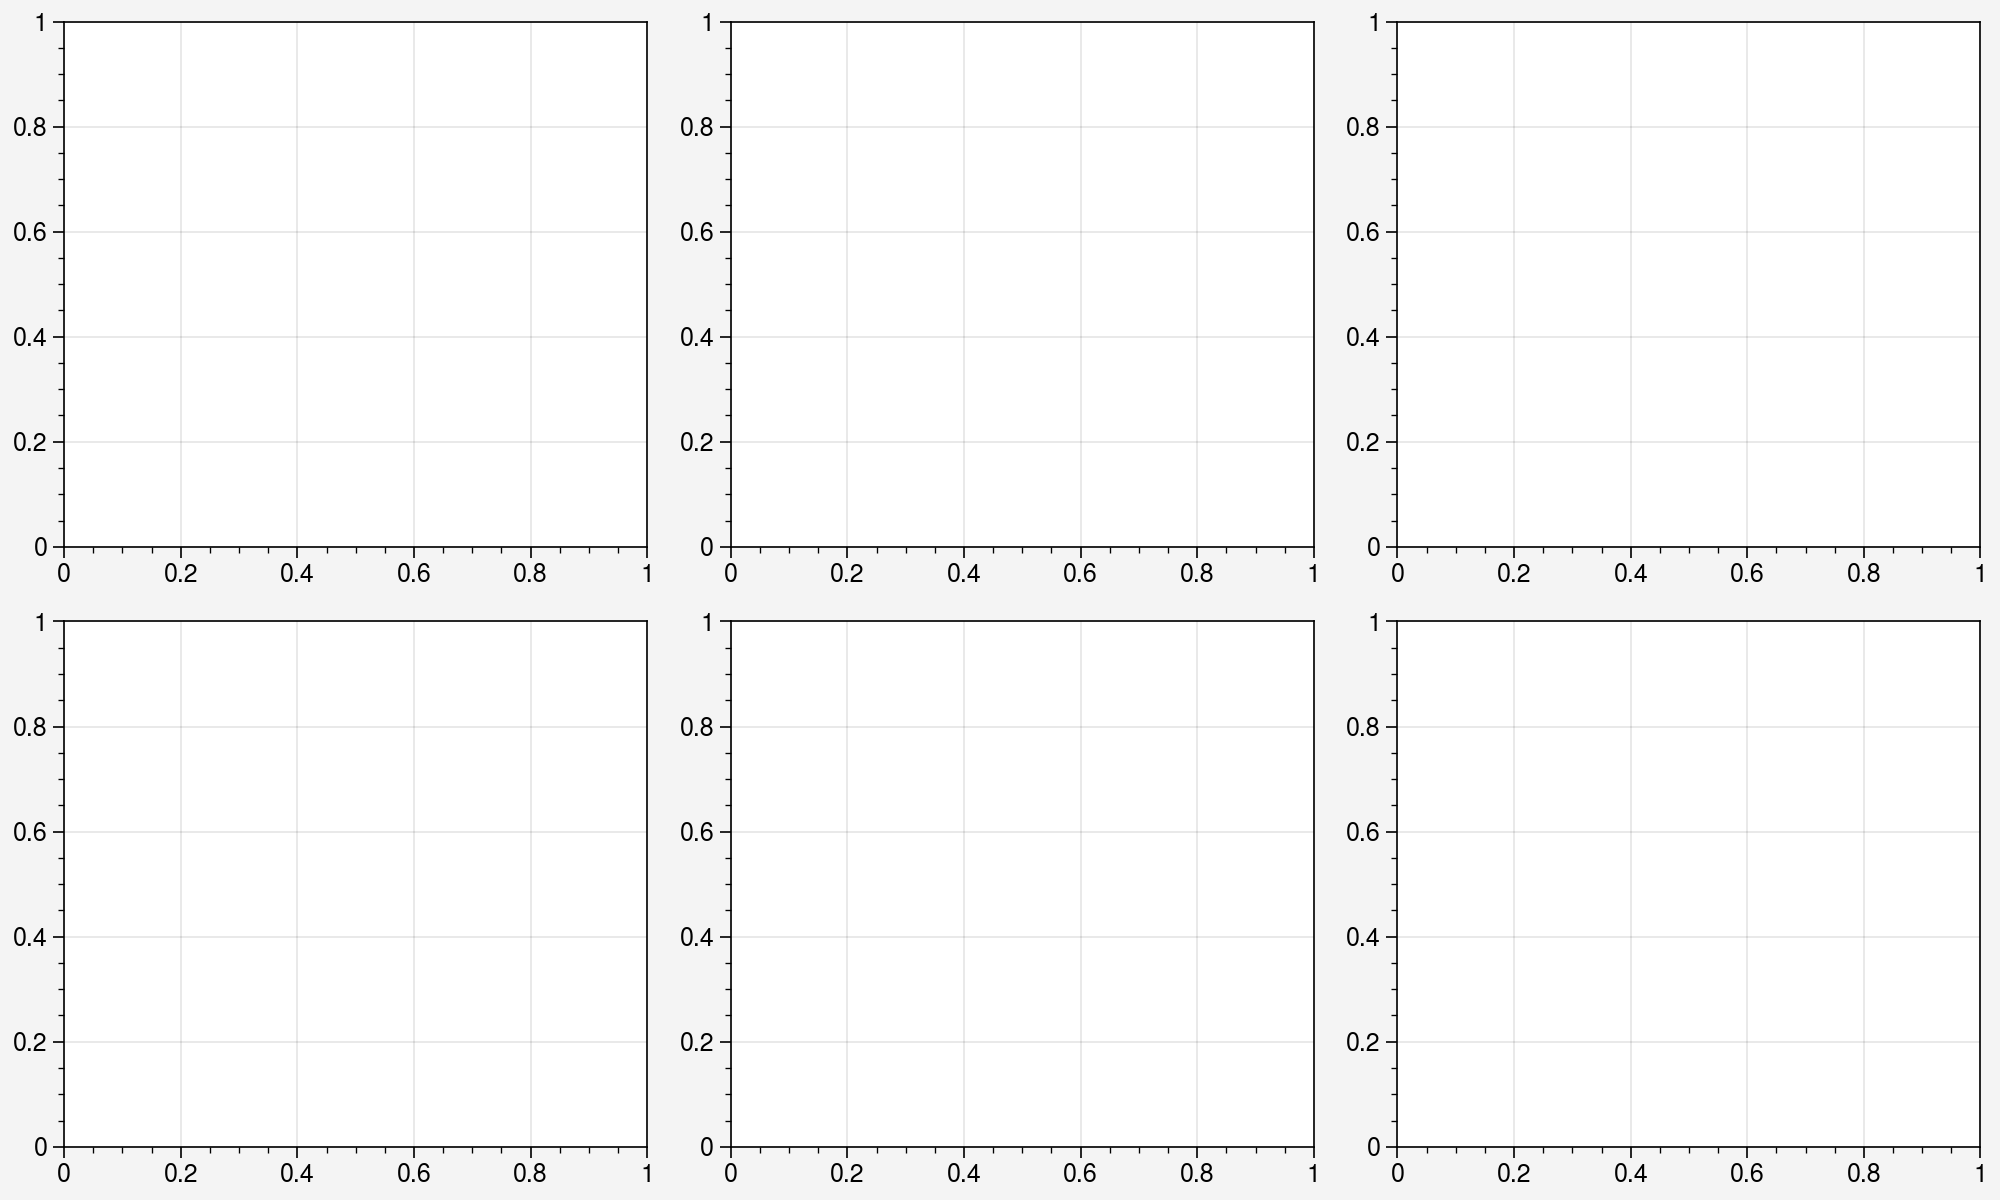

In [642]:
adr_area_threshold = lambda x: np.array([piecewise_threshold(x0, 100, 700, 0.27, 0.18) for x0 in x])
adr_convex_area_threshold = lambda x: np.array([piecewise_threshold(x0, 100, 700, 0.27, 0.17) for x0 in x])
adr_major_axis_threshold = lambda x: np.array([piecewise_threshold(x0, 100, 700, 0.16, 0.12) for x0 in x])
adr_minor_axis_threshold = lambda x: np.array([piecewise_threshold(x0,  100, 700, 0.20, 0.12) for x0 in x])
scaled_shape_difference_threshold = lambda x: np.array([piecewise_threshold(x0, 100,  700, 0.50, 0.32) for x0 in x])
psi_s_corr_threshold = lambda x: np.array([piecewise_threshold(x0, 100,  700, 0.84, 0.89) for x0 in x])


#### Plot ####
fig, axs = pplt.subplots(width=10, height=6, nrows=2, ncols=3, share=False)
ax = axs[0, 0]
h = []
for var, color, offset in zip(['max_adr_area', 'max_adr_convex_area',
                       'max_adr_major_axis_length', 'max_adr_minor_axis_length'],
                      ['tab:blue', 'tab:green', 'tab:orange', 'tab:gray'],
                             np.linspace(-0.3, 0.3, 4)):
    plot_data = df_rot.pivot_table(columns='area_bin', values=var, index=df_rot.index)
    plot_data = plot_data.loc[:, rotated_bin_count['area_count'] > 10]
    x = plot_data.columns.astype(int)
    plot_data.columns = plot_data.columns + offset
    ax.box(plot_data, fillcolor=color,  showfliers=True, marker='.', markersize=1, widths=0.2)
    h.append(ax.plot([],[], m='s', c=color, lw=0, ec='k'))

    # Draw grid lines
    for xc in x[:-1]:
        ax.axvline(xc + 0.5, lw=1, color='gray')
        
ax.format(xtickminor=False, #xlocator=bin_area_ave.round().values.squeeze(),
          xlocator=x, xlim=plot_range, ylim=(0, 0.3),
          xformatter=[str(int(x)) for x in rotated_bin_count.area_mean.round().values.squeeze()], xrotation=0,
         title='Max. ADR Under Rotation', xlabel='Bin-average floe area (pixels)', ylabel='Absolute Difference Ratio',
         xgrid=False)

ax.legend(h, ['Area', 'Convex Area', 'Major Axis Length', 'Minor Axis Length'], ncols=1)

ax = axs[1, 0]
h = []
for var, color, offset in zip(['adr_area', 'adr_convex_area', 'adr_major_axis_length', 'adr_minor_axis_length'],
                      ['tab:blue', 'tab:green', 'tab:orange', 'tab:gray'],
                             np.linspace(-0.3, 0.3, 4)):

    idx = df_mg[['terra_cloud_fraction', 'aqua_cloud_fraction']].max(axis=1) < 0.2
    
    plot_data = df_mg.loc[idx, :].pivot_table(columns='area_bin', values=var, index=df_mg.loc[idx, :].index)
    plot_data = plot_data.loc[:, matched_bin_count['area_count'] > 10]
    x = plot_data.columns.astype(int)
    plot_data.columns = plot_data.columns + offset
    ax.box(plot_data, fillcolor=color,  showfliers=True, marker='.', markersize=1,  widths=0.2)
    h.append(ax.plot([],[], m='s', c=color, lw=0, ec='k'))
    for xc in x[:-1]:
        ax.axvline(xc + 0.5, lw=1, color='gray')
        
ax.format(xtickminor=False, #xlocator=bin_area_ave.round().values.squeeze(),
          xlocator=x, xlim=plot_range, ylim=(0, 0.3),
          xformatter=[str(int(x)) for x in matched_bin_count.area_mean.round(1).values.squeeze()], xrotation=0,
         title='Matched Pair Abs. Diff. Ratio', xlabel='Bin-average floe area (pixels)', ylabel='Absolute Difference Ratio',
         xgrid=False)

ax.legend(h, ['Area', 'Convex Area', 'Major Axis Length', 'Minor Axis Length'], ncols=1)


for ax, var, color, dataframe, bin_counts in zip(
        [axs[0,1], axs[0,2], axs[1,1], axs[1,2]],
        ['min_psi_s_correlation', 'max_normalized_shape_difference', 'psi_s_correlation', 'normalized_shape_difference'],
        ['light gray', 'light gray', 'light gray', 'light gray'],
        [df_rotation.loc[df_rotation.training, :], df_rotation.loc[df_rotation.training, :],
         df_matched.loc[df_matched.training, :], df_matched.loc[df_matched.training, :]],
        [rotated_bin_count, rotated_bin_count, matched_bin_count, matched_bin_count]):

    plot_data = dataframe.pivot_table(columns='area_bin', values=var, index=dataframe.index)
    plot_data = plot_data.loc[:, bin_counts['area_count'] > 10]
    x = plot_data.columns.astype(int)
    ax.box(plot_data, fillcolor=color, showfliers=True, marker='.', markersize=1, widths=0.2)
    h.append(ax.plot([],[], m='s', c=color, lw=0, ec='k'))

    # Draw grid lines
    for xc in x[:-1]:
        ax.axvline(xc + 0.5, lw=1, color='gray')
        
    ax.format(xtickminor=False, 
              xlocator=x, xlim=plot_range,
              xformatter=[str(int(x)) for x in bin_counts.area_mean.round().values.squeeze()], xrotation=0,
              xlabel='Bin-average floe area (pixels)',
              xgrid=False, abc=True)

def piecewise_threshold(x, x0, x1, y0, y1):
    if x < x0:
        return y0
    elif x > x1:
        return y1
    else:
        return (y1 - y0)/(x1 - x0)*(x - x1) + y1

adr_area_threshold = lambda x: np.array([piecewise_threshold(x0, 100, 700, 0.27, 0.18) for x0 in x])
adr_convex_area_threshold = lambda x: np.array([piecewise_threshold(x0, 100, 700, 0.27, 0.17) for x0 in x])
adr_major_axis_threshold = lambda x: np.array([piecewise_threshold(x0, 100, 700, 0.16, 0.12) for x0 in x])
adr_minor_axis_threshold = lambda x: np.array([piecewise_threshold(x0,  100, 700, 0.20, 0.12) for x0 in x])
scaled_shape_difference_threshold = lambda x: np.array([piecewise_threshold(x0, 100,  700, 0.50, 0.32) for x0 in x])
psi_s_corr_threshold = lambda x: np.array([piecewise_threshold(x0, 100,  700, 0.84, 0.89) for x0 in x])

x = plot_data.columns
xval = bin_counts.loc[x, 'area_mean']
# xval = np.array([int(x0) for x0 in plot_data.area_mean.round().values.squeeze()])
print(xval)
axs[0,0].plot(x, adr_area_threshold(xval), color='tab:blue', lw=1)
axs[1,0].plot(x, adr_area_threshold(xval), color='tab:blue', lw=1)
axs[0,0].plot(x, adr_major_axis_threshold(xval), color='tab:red', lw=1)
axs[1,0].plot(x, adr_major_axis_threshold(xval), color='tab:red', lw=1)


axs[0,1].plot(x, psi_s_corr_threshold(xval), color='tab:blue', lw=1)
axs[1,1].plot(x, psi_s_corr_threshold(xval), color='tab:blue', lw=1)

axs[0,2].plot(x, scaled_shape_difference_threshold(xval), color='tab:blue', lw=1)
axs[1,2].plot(x, scaled_shape_difference_threshold(xval), color='tab:blue', lw=1)
    
axs[0,1].format(ylabel=r'$\psi-s$ Correlation', title='Minimum Correlation Under Rotation', ylim=(0.69, 1.01))
axs[1,1].format(ylabel=r'$\psi-s$ Correlation', title='Matched Pair Correlation', ylim=(0.69, 1.01))
axs[0,2].format(ylabel='Normalized Shape Difference', title='Max.-Min. Shape Difference', ylim=(-0.02, 0.52))
axs[1,2].format(ylabel='Normalized Shape Difference', title='Matched Pair Shape Difference', ylim=(-0.02, 0.52))

fig.format(abc=True)
fig.save('../figures/fig_XX_ADR_psi-s_normSD.png', dpi=300)

<a list of 1 Line2D objects>

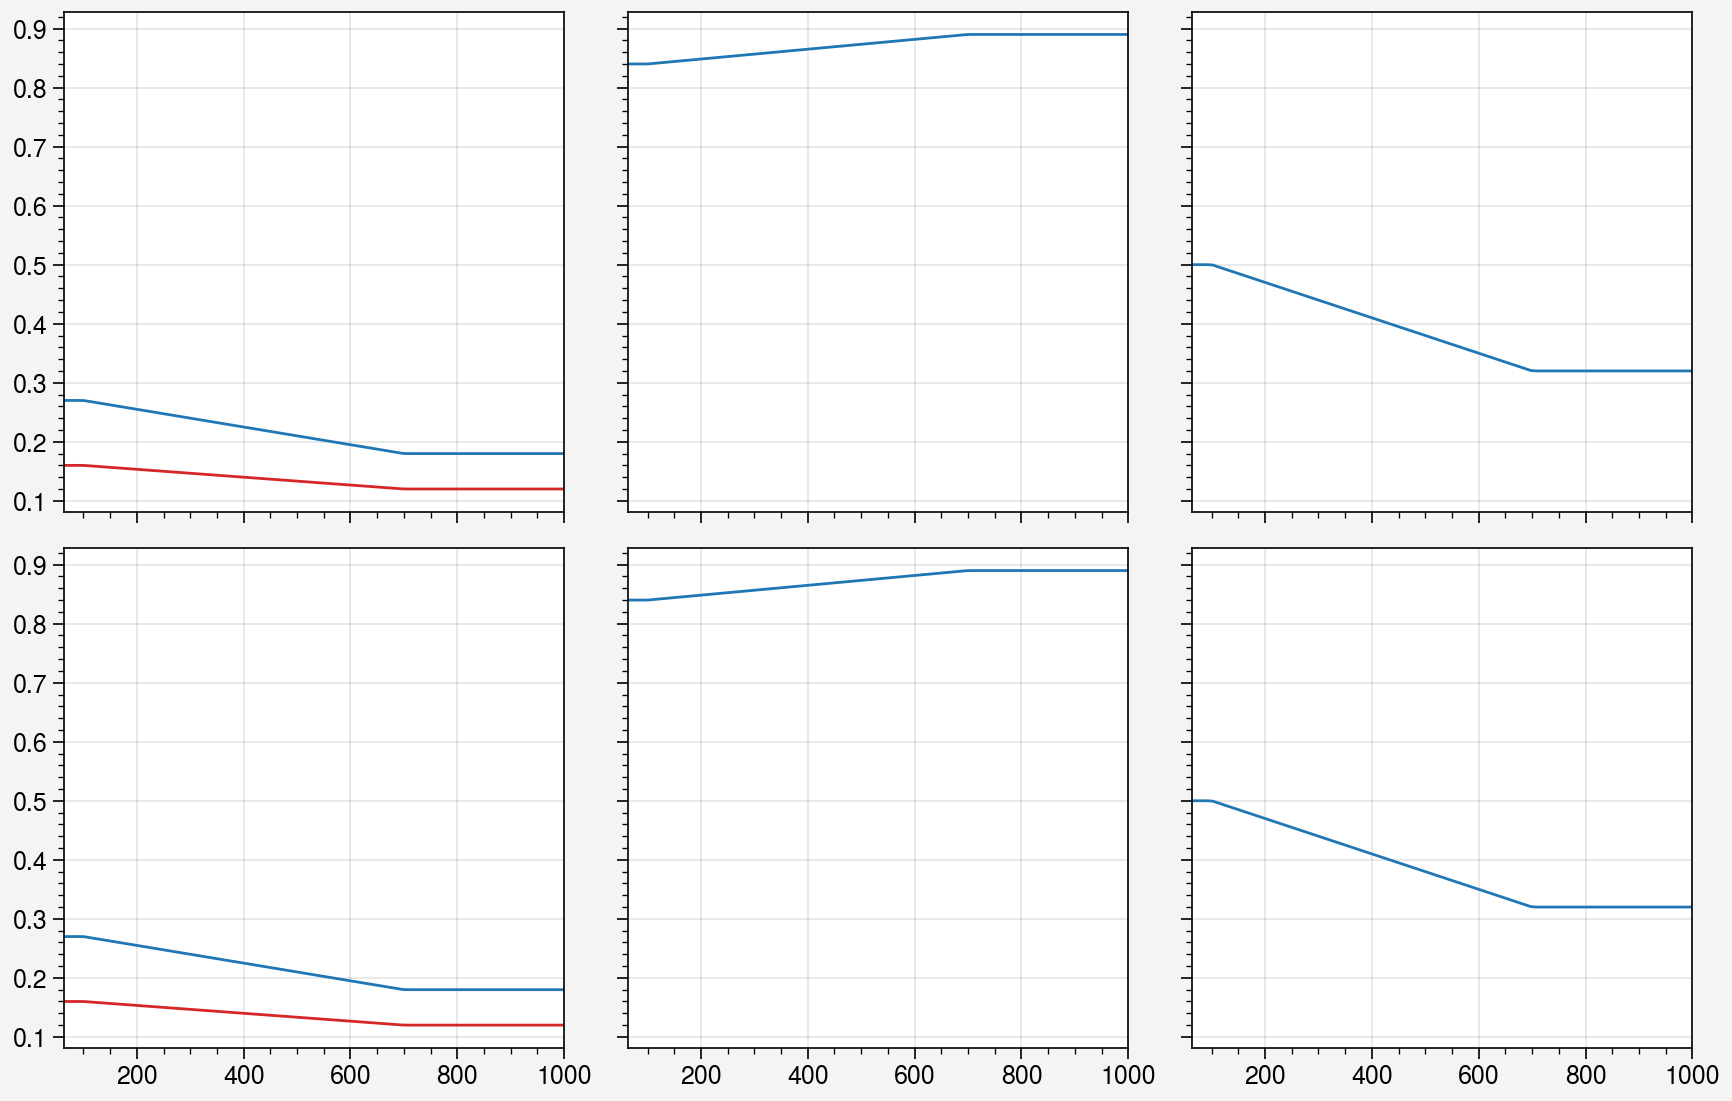

In [519]:
# piecewise linear functions

def piecewise_threshold(x, x0, x1, y0, y1):
    if x < x0:
        return y0
    elif x > x1:
        return y1
    else:
        return (y1 - y0)/(x1 - x0)*(x - x1) + y1


adr_area_threshold = lambda x: np.array([piecewise_threshold(x0, 100, 700, 0.27, 0.18) for x0 in x])
adr_convex_area_threshold = lambda x: np.array([piecewise_threshold(x0, 100, 700, 0.27, 0.17) for x0 in x])
adr_major_axis_threshold = lambda x: np.array([piecewise_threshold(x0, 100, 700, 0.16, 0.12) for x0 in x])
adr_minor_axis_threshold = lambda x: np.array([piecewise_threshold(x0,  100, 700, 0.20, 0.12) for x0 in x])
scaled_shape_difference_threshold = lambda x: np.array([piecewise_threshold(x0, 100,  700, 0.50, 0.32) for x0 in x])
psi_s_corr_threshold = lambda x: np.array([piecewise_threshold(x0, 100,  700, 0.84, 0.89) for x0 in x])
fig, axs = pplt.subplots(nrows=2, ncols=3)

x = np.linspace(64, 1000, 100)
axs[0,0].plot(x, adr_area_threshold(x), color='tab:blue', lw=1)
axs[1,0].plot(x, adr_area_threshold(x), color='tab:blue', lw=1)
axs[0,0].plot(x, adr_major_axis_threshold(x), color='tab:red', lw=1)
axs[1,0].plot(x, adr_major_axis_threshold(x), color='tab:red', lw=1)


axs[0,1].plot(x, psi_s_corr_threshold(x), color='tab:blue', lw=1)
axs[1,1].plot(x, psi_s_corr_threshold(x), color='tab:blue', lw=1)

axs[0,2].plot(x, scaled_shape_difference_threshold(x), color='tab:blue', lw=1)
axs[1,2].plot(x, scaled_shape_difference_threshold(x), color='tab:blue', lw=1)
 

adr_major_axis_length 0.0 0.3
adr_minor_axis_length 0.0 0.21
adr_area 0.0 0.36
adr_convex_area 0.0 0.35
normalized_shape_difference 0.07 0.61
psi_s_correlation 0.0 0.19


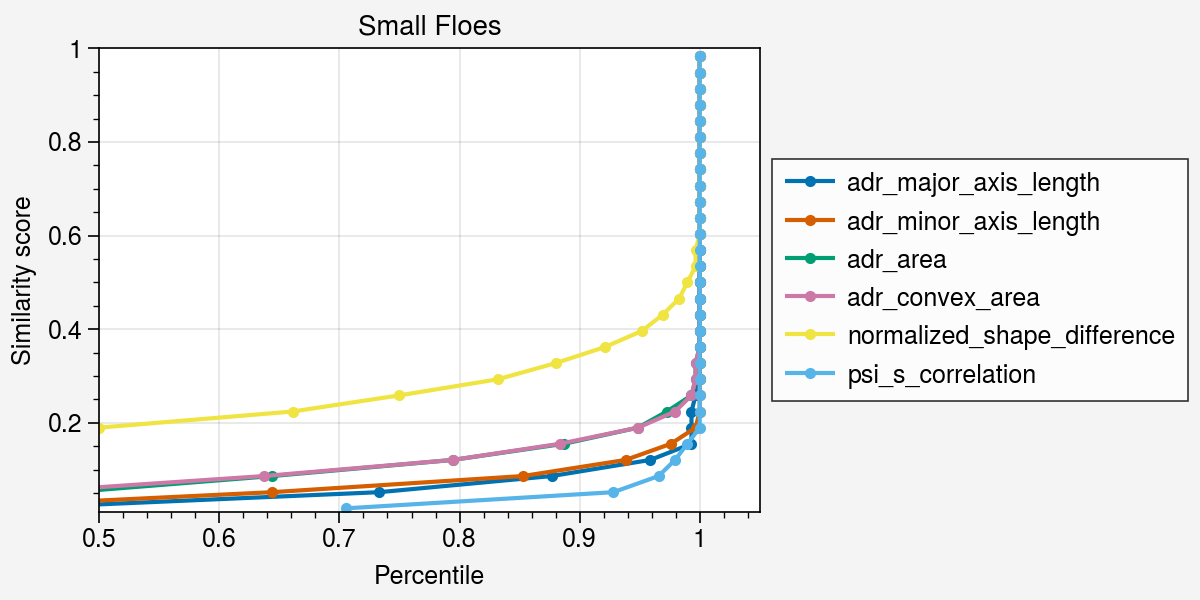

In [509]:
fig, ax = pplt.subplots(width=6, height=3)
for variable in [ 'adr_major_axis_length', 'adr_minor_axis_length', 'adr_area',
                  'adr_convex_area',  'normalized_shape_difference', 'psi_s_correlation']:

    min_area = 64
    breakpoint_area = 200
    data = df_matched.loc[df_matched.training & df_matched.area.between(min_area, breakpoint_area), variable]
    if 'psi' in variable:
        data = 1 - data
    
    print(variable, np.round(min(data), 2), np.round(max(data), 2))
    x, y = np.histogram(data, bins=np.linspace(0, 1, 30))
    yc = 0.5 * (y[1:] + y[:-1])
    
    ax.plot(np.cumsum(x)/np.sum(x), yc, marker='.', label=variable)
    # ax.axvline(0.5)
    # ax.axvline(0.95)
    # ax.axvline(0.99)
    ax.format(ylabel='Similarity score', xlabel='Percentile', xlim=(0.5, 1.05), ylim=(0.01, 1), title='Small Floes')
ax.legend(loc='r', ncols=1)

adr_major_axis_length 0.0 0.22
adr_minor_axis_length 0.0 0.13
adr_area 0.0 0.24
adr_convex_area 0.0 0.25
normalized_shape_difference 0.04 0.33
psi_s_correlation 0.0 0.15


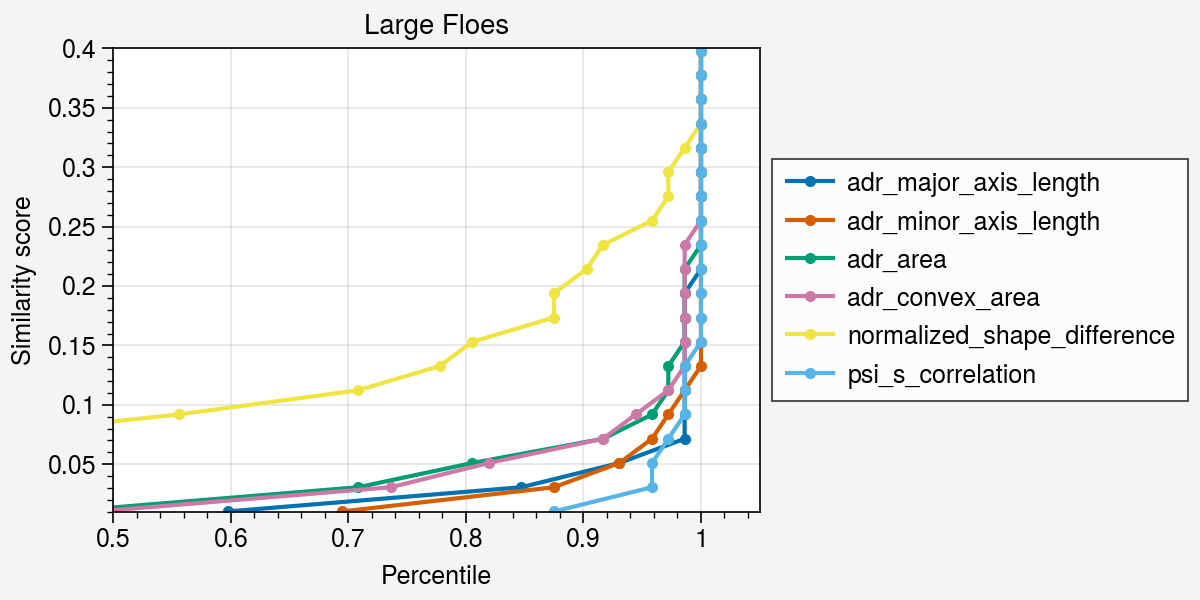

In [506]:
fig, ax = pplt.subplots(width=6, height=3)
for variable in [ 'adr_major_axis_length', 'adr_minor_axis_length', 'adr_area',
                  'adr_convex_area',  'normalized_shape_difference', 'psi_s_correlation']:

    min_area = 700
    breakpoint_area = 25600
    data = df_matched.loc[df_matched.training & df_matched.area.between(min_area, breakpoint_area), variable]
    if 'psi' in variable:
        data = 1 - data
    
    print(variable, np.round(min(data), 2), np.round(max(data), 2))
    x, y = np.histogram(data, bins=np.linspace(0, 1, 50))
    yc = 0.5 * (y[1:] + y[:-1])
    
    ax.plot(np.cumsum(x)/np.sum(x), yc, marker='.', label=variable)
    # ax.axvline(0.5)
    # ax.axvline(0.95)
    # ax.axvline(0.99)
    ax.format(ylabel='Similarity score', xlabel='Percentile', xlim=(0.5, 1.05), ylim=(0.01, 0.4), title='Large Floes')
ax.legend(loc='r', ncols=1)

# Testing the shape parameters on the testing data
Using the 99% thresholds, how many true positives do we reject? We test this by computing the fraction falling past the threshold for our test dataset. In all cases, the 99% percentile works as expected.

In [345]:
df_test = df_matched.loc[df_matched.training, :]

In [346]:
small = df_test.loc[df_test.area.between(min_area, breakpoint_area)]
large = df_test.loc[df_test.area.between(breakpoint_area, max_area)]

In [347]:
print('Small floes')
print('ADR major axis: ', np.round(np.mean(small.adr_major_axis_length < 0.24), 2))
print('ADR minor axis: ', np.round(np.mean(small.adr_minor_axis_length < 0.22),2))
print('ADR surface area: ', np.round(np.mean(small.adr_area < 0.37), 2))
print('ADR convex area: ', np.round(np.mean(small.adr_convex_area < 0.38), 2))
print('Norm. Shape Diff: ', np.round(np.mean(small.normalized_shape_difference < 0.75), 2))
print('Norm. Shape Diff: ', np.round(np.mean(small.psi_s_correlation > 0.84), 2))

Small floes
ADR major axis:  0.99
ADR minor axis:  0.99
ADR surface area:  0.99
ADR convex area:  0.99
Norm. Shape Diff:  0.99
Norm. Shape Diff:  0.99


In [352]:
print('Large floes')
print('ADR major axis: ', np.round(np.mean(large.adr_major_axis_length < 0.12), 2))
print('ADR minor axis: ', np.round(np.mean(large.adr_minor_axis_length < 0.12),2))
print('ADR surface area: ', np.round(np.mean(large.adr_area < 0.18), 2))
print('ADR convex area: ', np.round(np.mean(large.adr_convex_area < 0.17), 2))
print('Norm. Shape Diff: ', np.round(np.mean(large.normalized_shape_difference < 0.32), 2))
print('Norm. Shape Diff: ', np.round(np.mean(large.psi_s_correlation > 0.89), 2))

Large floes
ADR major axis:  0.99
ADR minor axis:  0.99
ADR surface area:  0.99
ADR convex area:  0.99
Norm. Shape Diff:  0.99
Norm. Shape Diff:  0.99


## Notes for next steps
- 

In [275]:
df_matched.loc[(df_matched.minimum_shape_difference > df_matched.aqua_area) | (df_matched.minimum_shape_difference > df_matched.terra_area),
    ['floe_id', 'aqua_area', 'terra_area', 'area', 'minimum_shape_difference', 'normalized_shape_difference']]

,floe_id,aqua_area,terra_area,area,minimum_shape_difference,normalized_shape_difference
7,107_0014,164.0,392.0,278.0,187.0,0.672662
9,006_0012,512.0,233.0,372.5,281.0,0.754362
6,022_0036,100.0,37.0,68.5,63.0,0.919708
6,016_0009,132.0,68.0,100.0,71.0,0.710000
18,016_0032,210.0,78.0,144.0,139.0,0.965278
82,016_0118,252.0,123.0,187.5,136.0,0.725333
20,093_0036,261.0,500.0,380.5,298.0,0.783180
0,011_0001,89.0,41.0,65.0,48.0,0.738462
13,011_0022,49.0,149.0,99.0,77.0,0.777778
24,138_0039,47.0,121.0,84.0,70.0,0.833333


These outliers occur in cases where there are large differences between the estimated area from Aqua and from Terra. These pairings should be double checked. However, assuming they are correct, what they are showing is how errors in the 

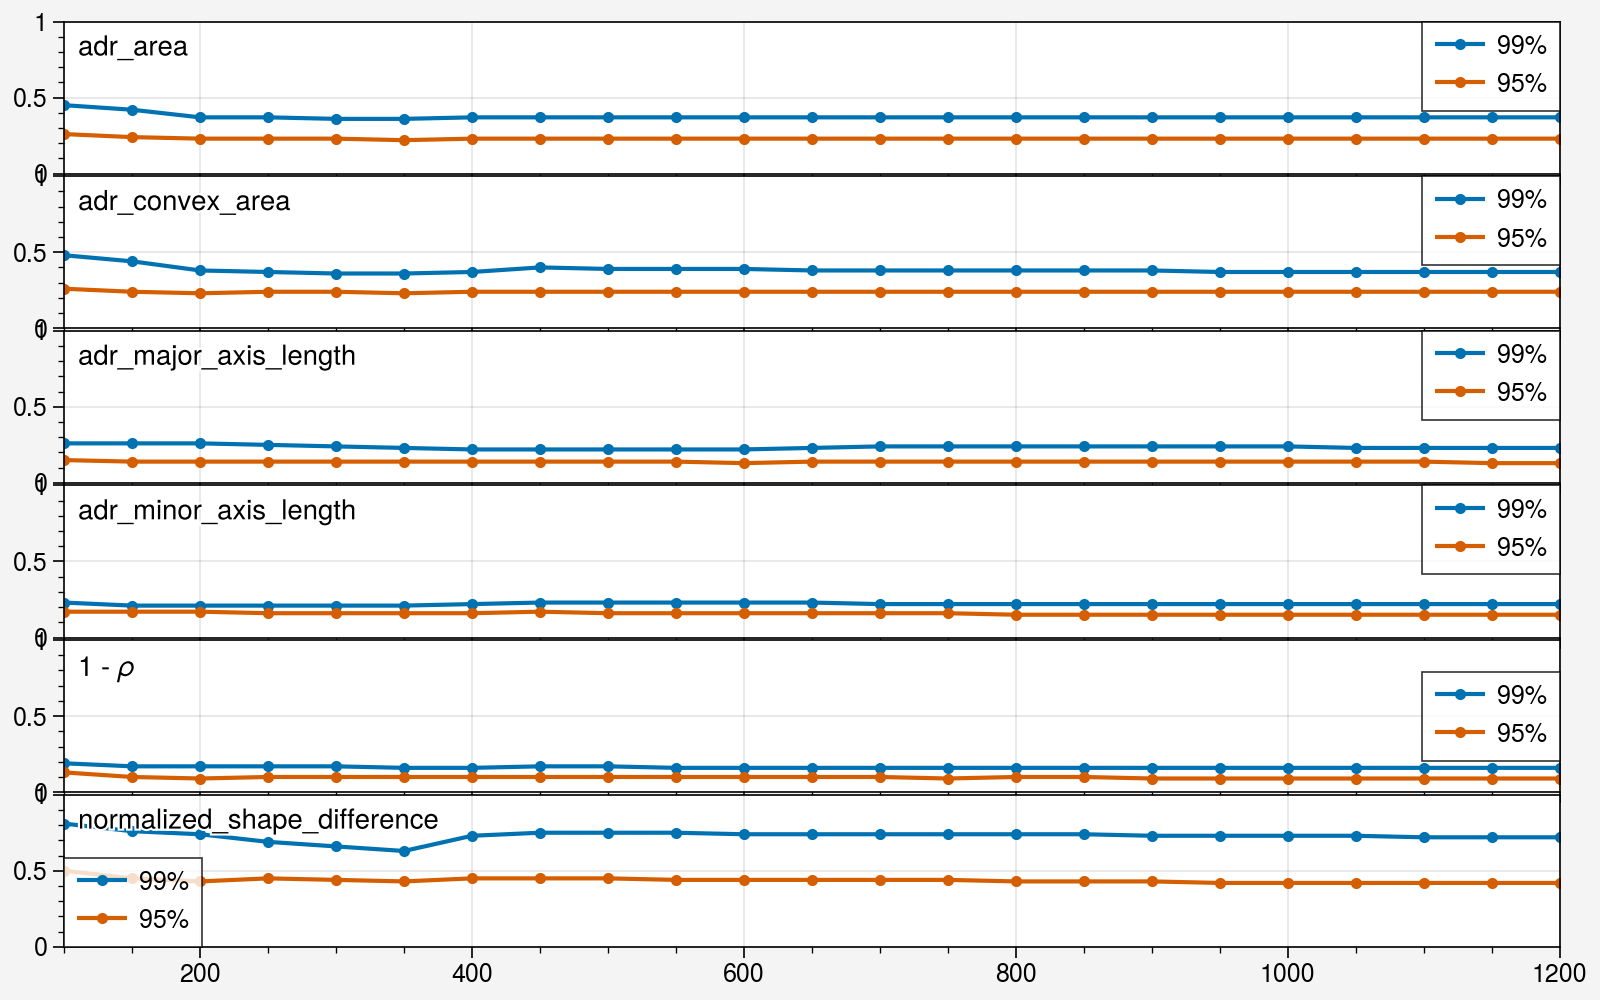

In [250]:
min_area = 64
fig, axs = pplt.subplots(width=8, height=5, nrows=6, hspace=0.1)
for ax, variable in zip(axs, ['adr_area', 'adr_convex_area', 'adr_major_axis_length',
                              'adr_minor_axis_length', 'psi_s_correlation', 'normalized_shape_difference']):
    pct95 = []
    pct99 = []

    for breakpoint_area in np.arange(100, 1201, 50):
        data = df_matched.loc[df_matched.training & df_matched.area.between(min_area, breakpoint_area), variable]
        if variable == 'psi_s_correlation':
            data = 1 - data
        pct99.append(np.round(data.quantile(0.99), 2))
        pct95.append(np.round(data.quantile(0.95), 2))
    ax.plot(np.arange(100, 1201, 50), pct99, m='.', label='99%')
    ax.plot(np.arange(100, 1201, 50), pct95, m='.', label='95%')
    ax.format(ultitle=variable, ylim=(0, 1))
    ax.legend(ncols=1)
axs[-2].format(ultitle='1 - $\\rho$')

In [218]:
700 * 0.25*0.25

43.75

In [154]:
for variable in ['adr_area', 'adr_convex_area', 'adr_major_axis_length', 'adr_minor_axis_length']:



adr_area 99pctl 0.295
adr_convex_area 99pctl 0.301
adr_major_axis_length 99pctl 0.223
adr_minor_axis_length 99pctl 0.242


In [143]:
df_all.loc[df_all.area == df_all.area.max()]

,floe_id,rotation,area,convex_area,major_axis_length,minor_axis_length,perimeter,adr_area,adr_convex_area,adr_major_axis_length,adr_minor_axis_length,rotation_estimated,minimum_shape_difference,psi_s_correlation,case,L,rotation_error,absolute_rotation_error,area_bin
40798,160_0001,-39.0,160004.0,160604.0,461.886726,461.886726,1655.870417,0.027062,0.001884,0.010508,0.011431,-39.0,172.0,0.936,160,400.005,0.0,0.0,20
40803,160_0001,-24.0,160004.0,160712.0,461.893181,461.893181,1728.410388,0.027062,0.002220,0.010501,0.011438,-24.0,112.0,0.975,160,400.005,0.0,0.0,20
40819,160_0001,24.0,160004.0,160712.0,461.893181,461.893181,1728.410388,0.027062,0.002220,0.010501,0.011438,-66.0,112.0,0.976,160,400.005,90.0,90.0,20
40824,160_0001,39.0,160004.0,160604.0,461.886726,461.886726,1655.870417,0.027062,0.001884,0.010508,0.011431,-51.0,172.0,0.936,160,400.005,90.0,90.0,20


# Errors and TBD items
* 160: Error in the estimated rotations for one of the floes -- floe area larger than entire image!
* 

What isn't shown here yet is the error in the actual estimation of rotation. Some questions: How close do we tend to get to the correct rotation? How does the variance in the rotation estimates change with floe size?

TBD: For tie breakers, we should randomly select between negative and positive, not default to right.

In [65]:
df_all['rotation_error'] = df_all['rotation'] - df_all['rotation_estimated']

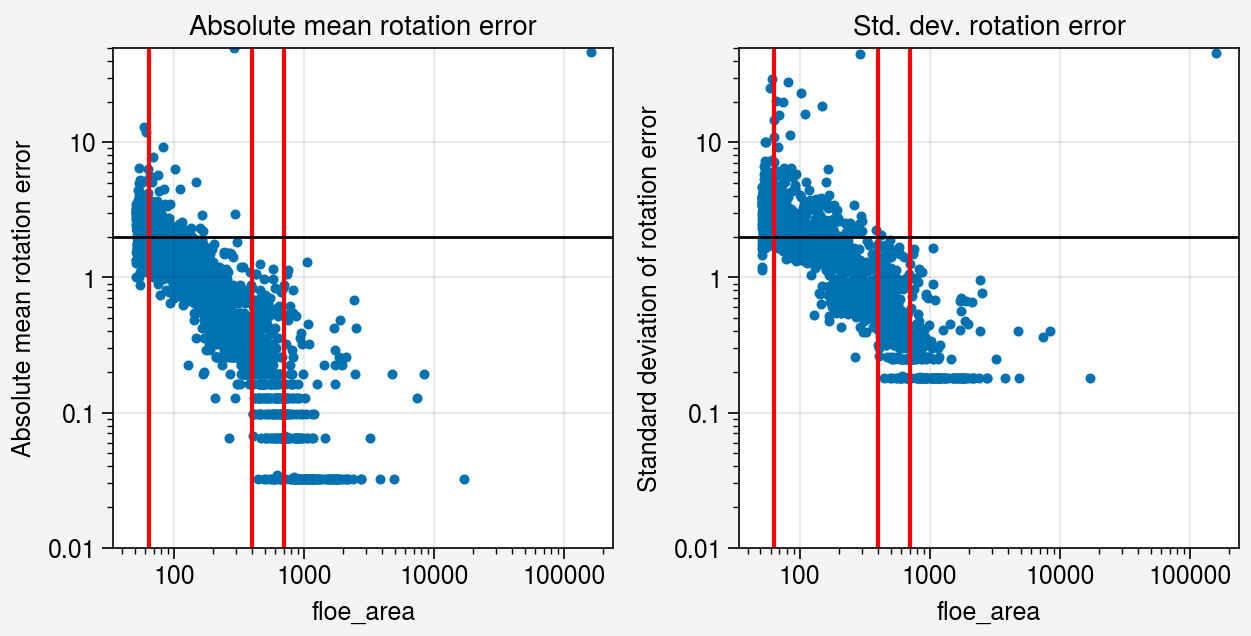

In [123]:
test = pd.DataFrame({'floe_area': df_all[['floe_id', 'area']].groupby('floe_id').mean()['area'],
                     'rotation_error_std': df_all[['floe_id', 'rotation_error']].groupby('floe_id').std()['rotation_error']})
fig, axs = pplt.subplots(ncols=2, share=False)
ax = axs[1]
ax.scatter(test['floe_area'].values, test['rotation_error_std'].values, marker='.')
ax.format(yscale='log', xscale='log', ylabel='Standard deviation of rotation error', xlabel='floe_area', ylim=(0.01, 50), title='Std. dev. rotation error')
ax.axvline(64, color='r')
ax.axvline(400, color='r')
ax.axvline(700, color='r')
ax.axhline(2, color='k', lw=1)
ax = axs[0]
test = pd.DataFrame({'floe_area': df_all[['floe_id', 'area']].groupby('floe_id').mean()['area'],
                     'absolute_mean_error': df_all[['floe_id', 'rotation_error']].groupby('floe_id').apply(lambda x: np.mean(np.abs(x)))})
ax.scatter(test['floe_area'].values, test['absolute_mean_error'].values, marker='.')
ax.format(yscale='log', xscale='log', ylabel='Absolute mean rotation error', xlabel='floe_area', ylim=(0.01, 50), title='Absolute mean rotation error')
ax.axvline(64, color='r')
ax.axvline(400, color='r')
ax.axvline(700, color='r')
ax.axhline(2, color='k', lw=1)

From the rotation error, it seems like overall we can still get reasonably good rotation rates from small floes in many cases, but that the frequency of large errors increases.

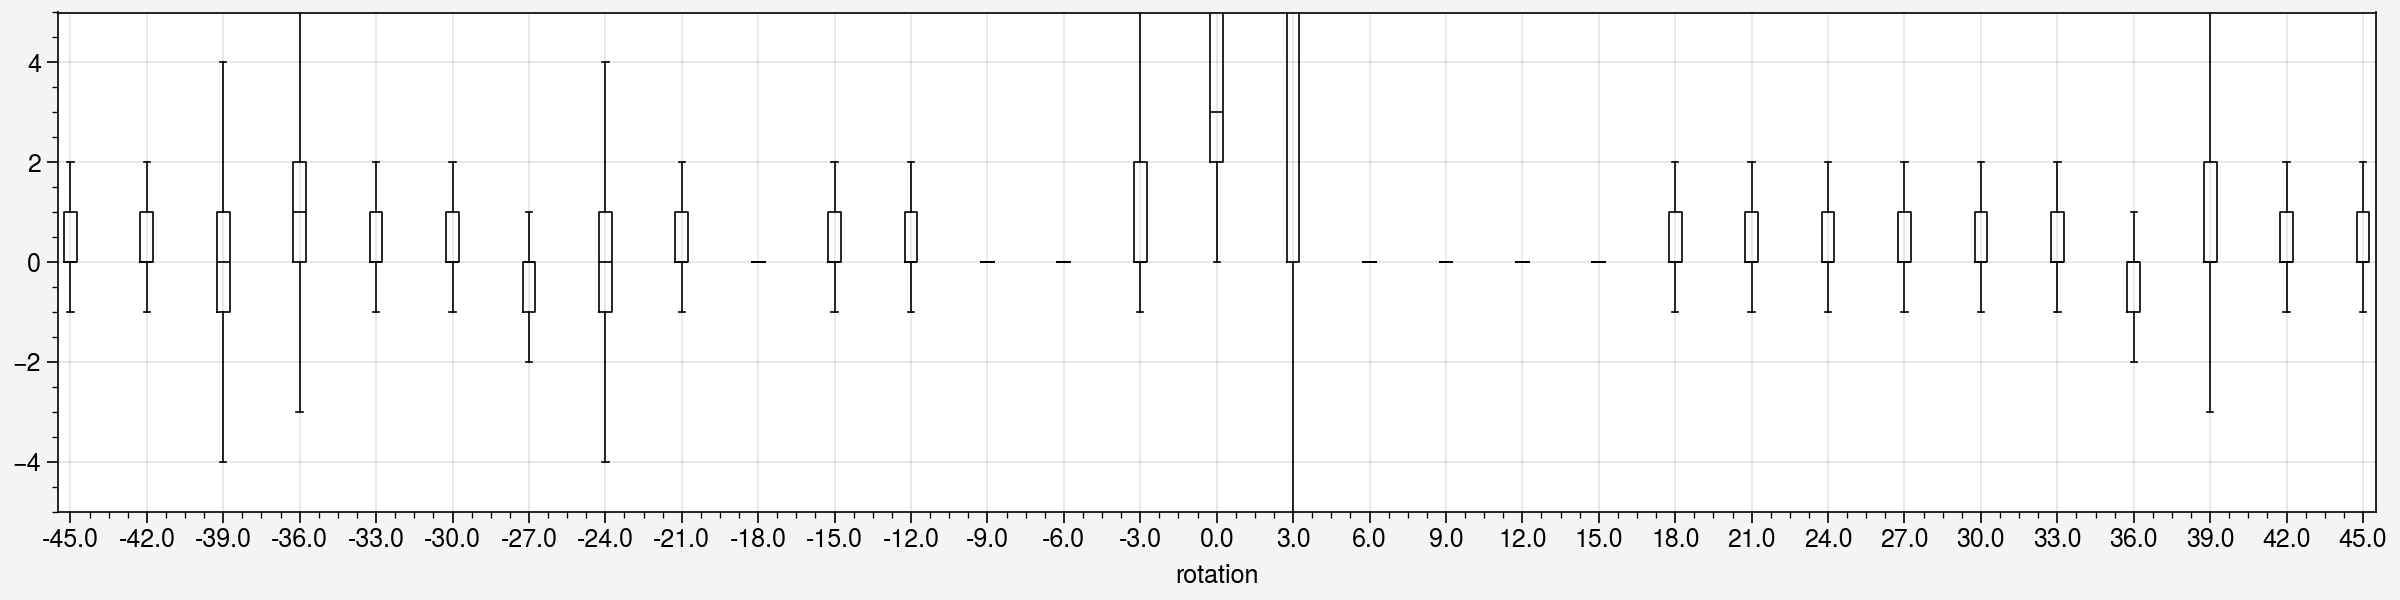

In [89]:
test = df_all.pivot_table(index='floe_id', columns='rotation', values='rotation_error')
fig, axs = pplt.subplots(width=12, height=3)
axs.box(test, fliers=False)
axs.format(ylim=(-5, 5))


In [96]:
df_all['area_bin'] = np.digitize(df_all['area'], bins)

df_all.columns

Index(['floe_id', 'rotation', 'area', 'convex_area', 'major_axis_length',
       'minor_axis_length', 'perimeter', 'adr_area', 'adr_convex_area',
       'adr_major_axis_length', 'adr_minor_axis_length', 'rotation_estimated',
       'minimum_shape_difference', 'psi_s_correlation', 'case', 'L',
       'rotation_error', 'absolute_rotation_error', 'area_bin'],
      dtype='object')

In [109]:
df_all['absolute_rotation_error'] = np.abs(df_all['rotation_error'])
test = df_all[['rotation', 'rotation_error', 'L', 'area', 'area_bin']].groupby(['area_bin', 'rotation']).mean()

In [101]:
test.reset_index(inplace=True)

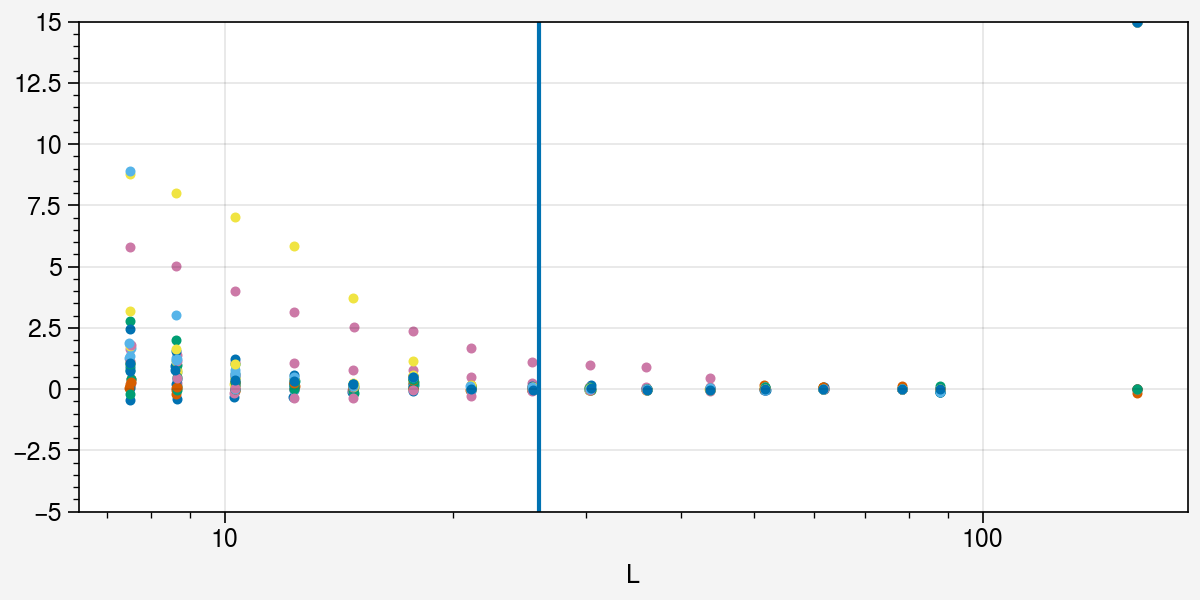

In [114]:
fig, ax = pplt.subplots(width=6, height=3)
ax.scatter(test.pivot_table(index='L', columns='rotation', values='rotation_error'), marker='.')
ax.format(ylim=(-5, 15), xscale='log')
ax.axvline(26)

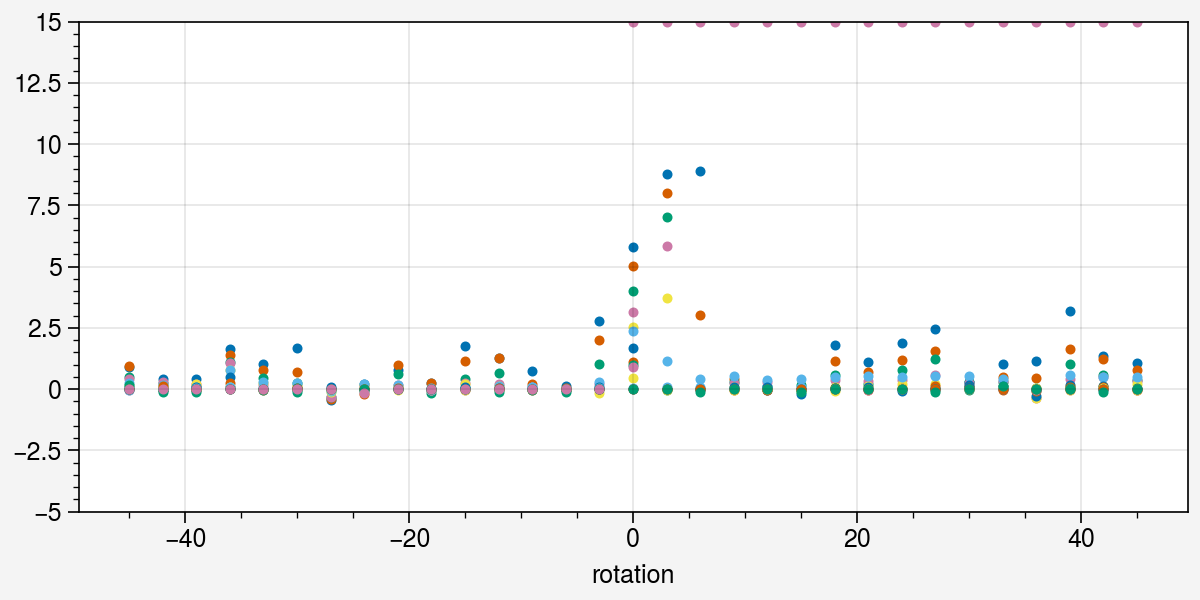

In [107]:
fig, ax = pplt.subplots(width=6, height=3)
ax.scatter(test.pivot_table(index='rotation', columns='area_bin', values='rotation_error'), marker='.')
ax.format(ylim=(-5, 15))

Some things to check:
- It is clear that we've got a bias in the rotation due to the choice of selecting the minimum angle. This is a bias coded into the function so it's one we can address easily.
- It is harder to detect small rotations, especially if the 

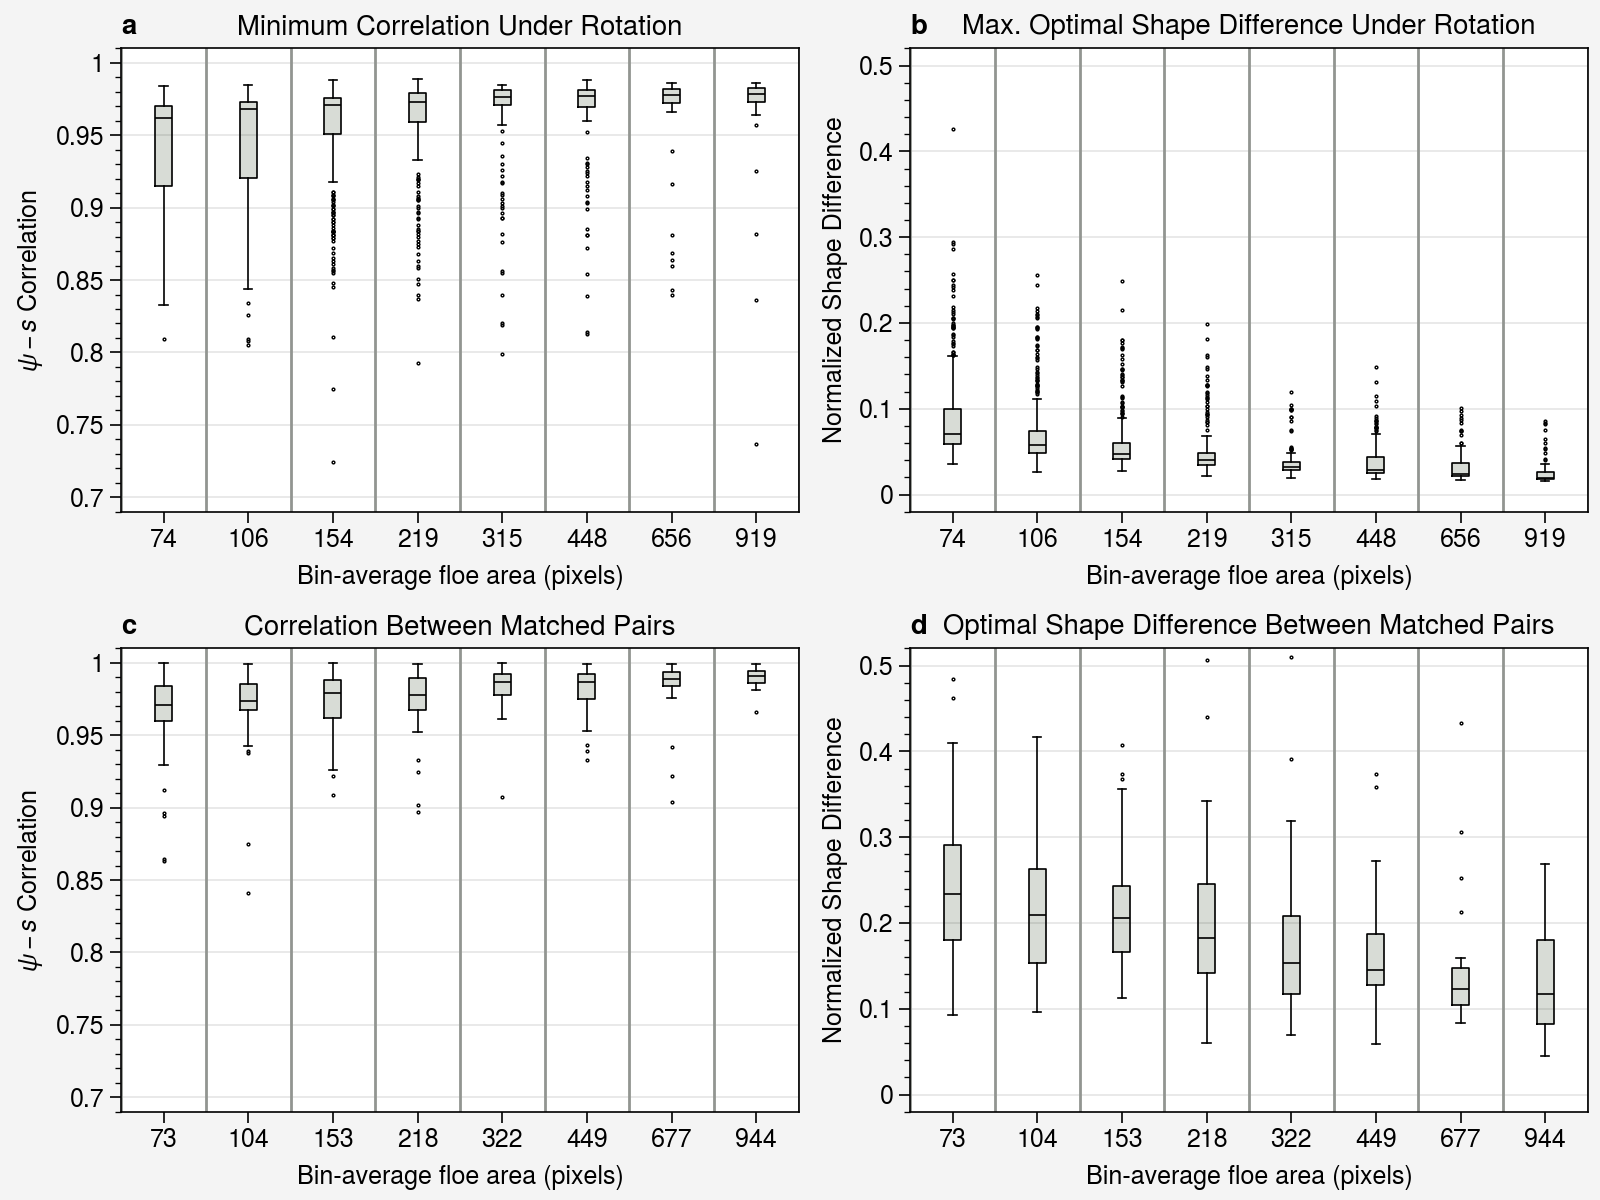

Index(['aqua_label', 'terra_label', 'aqua_area', 'aqua_convex_area',
       'aqua_major_axis_length', 'aqua_minor_axis_length', 'aqua_perimeter',
       'aqua_perimeter_crofton', 'aqua_perimeter_boundary_pixels',
       'terra_area', 'terra_convex_area', 'terra_major_axis_length',
       'terra_minor_axis_length', 'terra_perimeter', 'terra_perimeter_crofton',
       'terra_perimeter_boundary_pixels', 'adr_area', 'adr_convex_area',
       'adr_major_axis_length', 'adr_minor_axis_length', 'rotation_estimated',
       'minimum_shape_difference', 'psi_s_correlation', 'case', 'floe_id',
       'area', 'perimeter', 'normalized_shape_difference', 'L', 'area_bin',
       'training'],
      dtype='object')

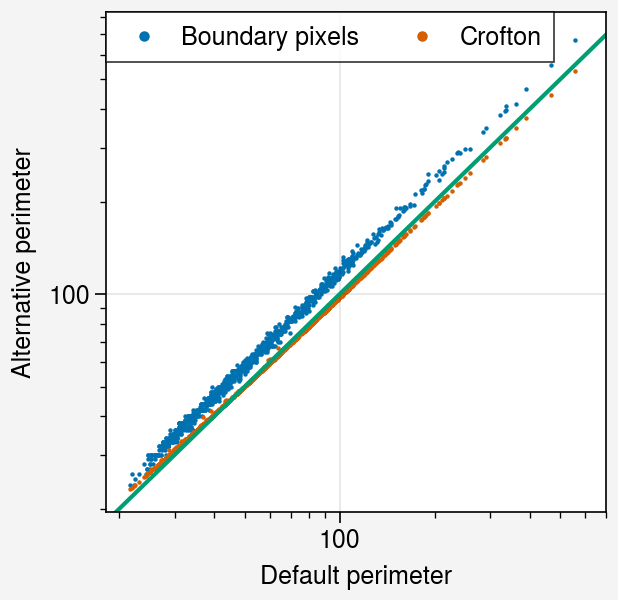

In [14]:
fig, ax = pplt.subplots()
ax.scatter(df_matched.aqua_perimeter, df_matched.aqua_perimeter_boundary_pixels, ms=1, label='Boundary pixels')
ax.scatter(df_matched.aqua_perimeter, df_matched.aqua_perimeter_crofton, ms=1, label='Crofton')
ax.plot([0, 700], [0, 700])
ax.format(yscale='log', xscale='log', ylabel='Alternative perimeter', xlabel='Default perimeter')
ax.legend(ms=10)

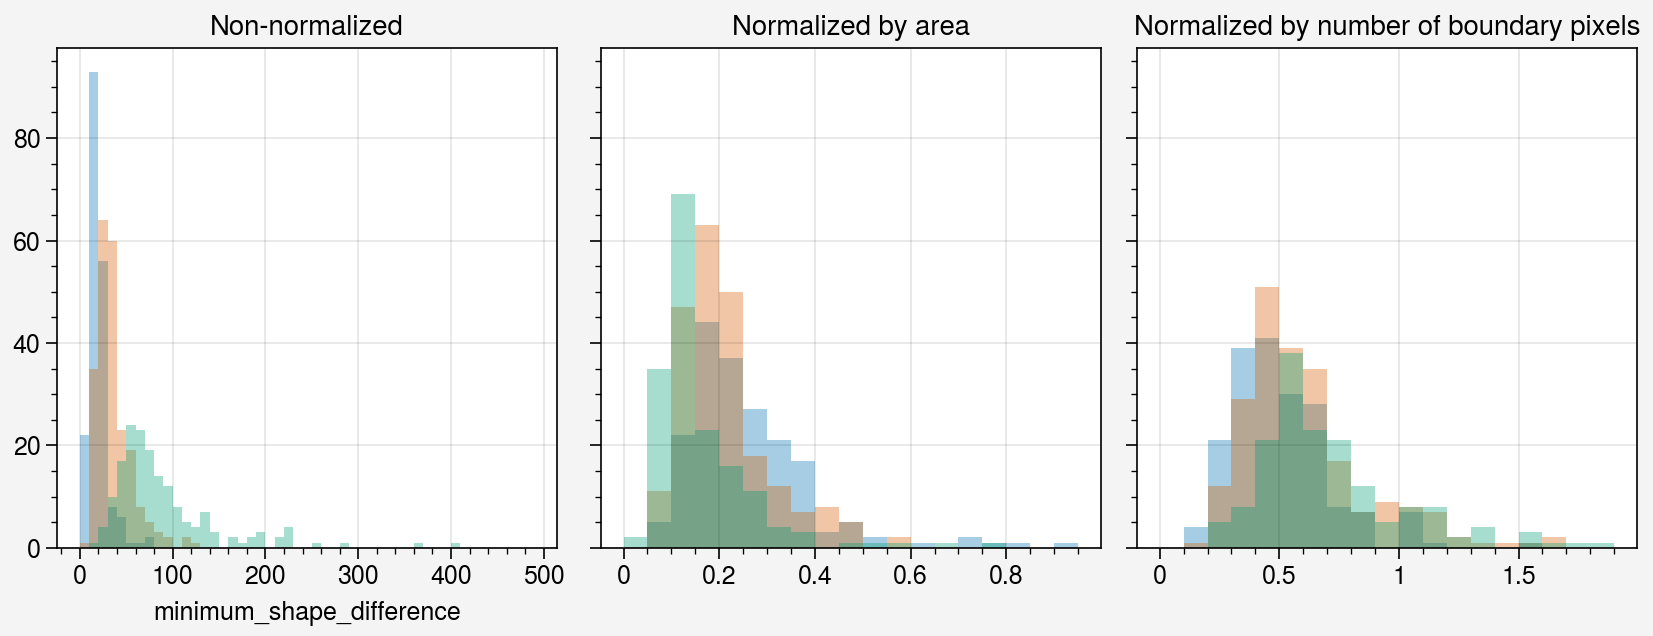

In [44]:
fig, ax = pplt.subplots(ncols=3)
for idx in [df_matched.training & (df_matched.area < 100),
            df_matched.training & df_matched.area.between(100, 300),
            df_matched.training & df_matched.area.between(300, 1500)]:

    ax[0].hist(df_matched.minimum_shape_difference.loc[idx], bins=np.arange(0, 500, 10), alpha=0.35)
    ax[1].hist(df_matched.minimum_shape_difference.loc[idx] / df_matched.area.loc[idx], bins=np.arange(0, 1, 0.05), alpha=0.35)
    ax[2].hist(df_matched.minimum_shape_difference.loc[idx] / df_matched.aqua_perimeter_boundary_pixels.loc[idx], bins=np.arange(0, 2, 0.1), alpha=0.35)
ax[0].format(title='Non-normalized')
ax[1].format(title='Normalized by area')
ax[2].format(title='Normalized by number of boundary pixels')

<a list of 1 Line2D objects>

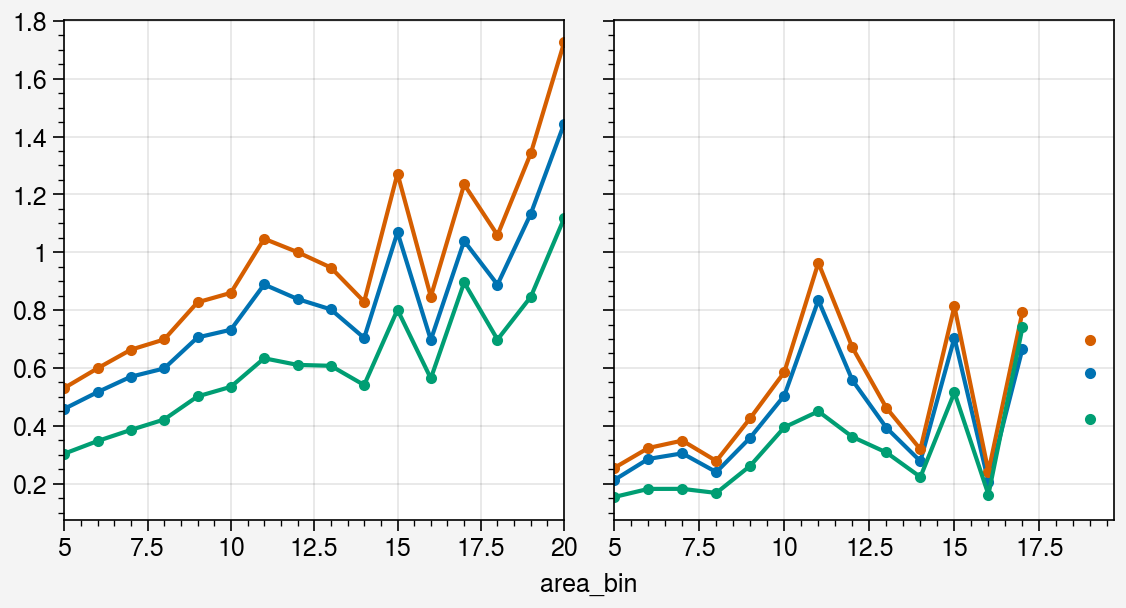

In [55]:
fig, axs = pplt.subplots(ncols=2)
idx = df_matched.training
ax = axs[0]
ax.plot((df_matched.minimum_shape_difference.loc[idx] / df_matched.aqua_perimeter_boundary_pixels.loc[idx]).groupby(df_matched.loc[idx, 'area_bin']).mean(), marker='.', label='boundry pixels')
ax.plot((df_matched.minimum_shape_difference.loc[idx] / df_matched.aqua_perimeter.loc[idx]).groupby(df_matched.loc[idx, 'area_bin']).mean(), marker='.', label='perimeter')
ax.plot((df_matched.minimum_shape_difference.loc[idx] / (2*np.pi*np.sqrt(df_matched.area.loc[idx]))).groupby(df_matched.loc[idx, 'area_bin']).mean(), marker='.', label='effective circumference')
ax = axs[1]
ax.plot((df_matched.minimum_shape_difference.loc[idx] / df_matched.aqua_perimeter_boundary_pixels.loc[idx]).groupby(df_matched.loc[idx, 'area_bin']).std(), marker='.', label='boundry pixels')
ax.plot((df_matched.minimum_shape_difference.loc[idx] / df_matched.aqua_perimeter.loc[idx]).groupby(df_matched.loc[idx, 'area_bin']).std(), marker='.', label='perimeter')
ax.plot((df_matched.minimum_shape_difference.loc[idx] / (2*np.pi*np.sqrt(df_matched.area.loc[idx]))).groupby(df_matched.loc[idx, 'area_bin']).std(), marker='.', label='effective circumference')